# **TITLE : Guide to your Desired University**

# **ABSTRACT**

Back in India, students face difficulty in choosing the right university for their profile. There is always an ambiguity in choosing the best one which fits one's requirements. It can be made easy when narrowed down to a few options. In this project, we are building a recommender system which is based on a classification algorithm. This system recommends the students the best university for their higher education which is compatible with their GRE, English Proficiency Test scores, GPA (Academics) and also based on the previous records of the students who have secured an admission in that respective university.





# **GROUP MEMBERS**

Name          : Manish Kumar Paladhi

Email         : mpala007@odu.edu

Web Portfolio : https://manishpaladhi.github.io/github.io/



Name          : Sanjana Bolla

Email         : sboll003@odu.edu

Web Portfolio : https://sanjanab5.github.io/



Name           : Sridivya Majeti

Email          : smaje003@odu.edu

Web Portfolio  : https://sridivya39.github.io/





# **GOALS AND INDIVIDUAL CONTRIBUTION**








**GOALS:**

1. Obtain a raw dataset and perform pre-processing steps. 

2. Model a recommender system using classification alorigthms like Random Forest, SVM, etc. Shortlisting the Universities based on different parameters like Budget, Course, Ranking etc (from a Student's Perspective).

3. Ultimately, our goal is to recommend a University which fits best to a student as per his/her profile. 

**INDIVIDUAL CONTRIBUTION:**

1.   Manish: Data Analysis, Cleaning and Modeling 
2.   Sanjana: Data Visualization and Modeling.
3.   Sridivya: Data Normalization and Modeling. 
  



# **PROBLEM** **STATEMENT**
Since United States is one of the top destinations for students across the globe to pursue their graduate studies, shortlisting the university is of utmost importance to them. Shortlisting a university comes along with a lot of challenges. Even though there are resources available on the internet, they are all based on university rankings rather than considering the student's requirements. Each student has their own requirements and they should be able shortlist universities based on them. Hence we decided to develop a university recommender system that will guide students based on input of the student's academic data. 


# **SYSTEM** **DESIGN**



##**System Architecture:**

The entire project is represented as the following process flowchart:

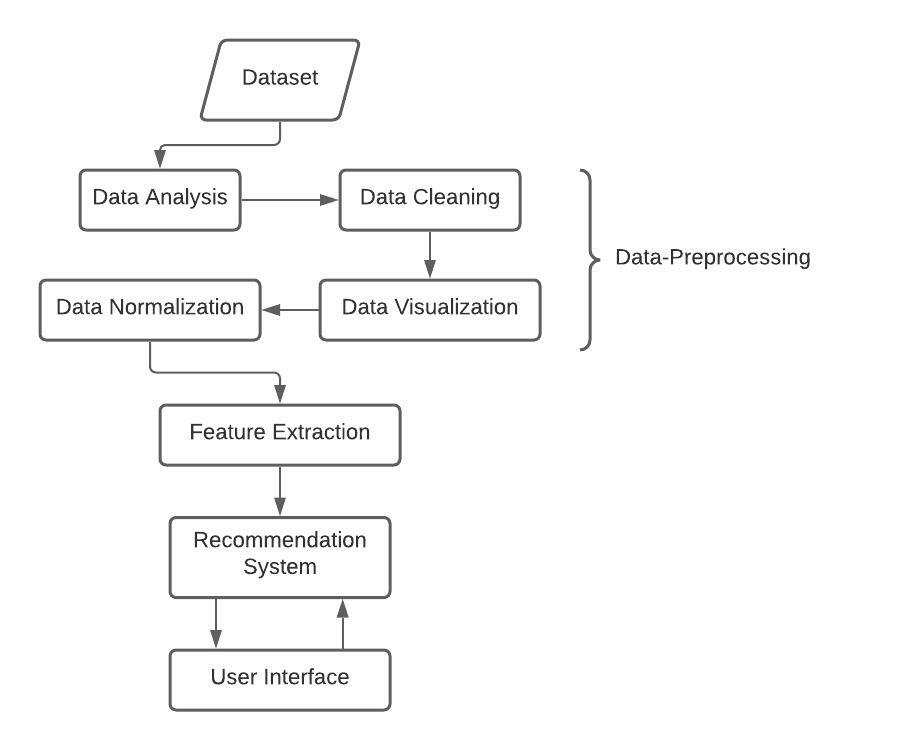

##**Technologies Used:**

*   Language: Python 
*   Software: Lucid, Microsoft Power Bi
*   Libraries: Pandas, Numpy, Scikit-learn
*   Visualization: Seaborn, Matplotlib
*   Framework: Bootstrap, Python Flask

# **DATA SOURCE**



URL : https://www.kaggle.com/nitishabharathi/university-recommendation?select=original_data.csv



**Description**: 

Dataset is a very crucial part of a recommender system. The dataset we are considering is **original_data.csv** which consists of 53,463 student profiles. Each profile has attributes like GRE score (verbal, quantitative and analytical writing), TOEFL scores, work experience (in years), internship experience, research experience, number of journal publications, CGPA, undergraduate university, undergraduate major, and intended specialization.

There's also a **score_table.csv** dataset that we are considering which has the new GRE score for the respective old GRE score. This is the dataset we will be using for converting the old GRE score to the new GRE score

Below is a sample of both the datasets that we will be using in the project.

In [ ]:
from google.colab import drive
drive.mount('sample_data/drive/')

Drive already mounted at sample_data/drive/; to attempt to forcibly remount, call drive.mount("sample_data/drive/", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from collections import defaultdict
import warnings
import seaborn as sns

df = pd.read_csv('sample_data/drive/MyDrive/original_data.csv')
score_table = pd.read_csv('sample_data/drive/MyDrive/score.csv')
display(df)
display(score_table)

userName  ... admit
0             143saf  ...     1
1         7790ashish  ...     1
2               AB25  ...     1
3           abhijitg  ...     1
4        abhijitgang  ...     1
...              ...  ...   ...
53639         zapp11  ...     0
53640      zathurian  ...     0
53641      zeal_vyas  ...     0
53642  zidanefaraday  ...     0
53643       zohaib16  ...     0

[53644 rows x 26 columns]

old  newQ  newV
0   800   166   170
1   790   164   170
2   780   163   170
3   770   161   170
4   760   160   170
..  ...   ...   ...
56  240   133   131
57  230   132   130
58  220   132   130
59  210   131   130
60  200   131   130

[61 rows x 3 columns]

#**DATA ANALYSIS**

Below, we are displaying the dataset that we are using to build the recommender system and this dataset will go through several filters to finally obtain the clean dataset.

In [ ]:
display(df)

userName  ... admit
0             143saf  ...     1
1         7790ashish  ...     1
2               AB25  ...     1
3           abhijitg  ...     1
4        abhijitgang  ...     1
...              ...  ...   ...
53639         zapp11  ...     0
53640      zathurian  ...     0
53641      zeal_vyas  ...     0
53642  zidanefaraday  ...     0
53643       zohaib16  ...     0

[53644 rows x 26 columns]

In the dataset we have, there are 53,644 rows and 24 columns which means that there are 53,644 list of students and 24 features for each one.

In [ ]:
print(df)

            userName  ... admit
0             143saf  ...     1
1         7790ashish  ...     1
2               AB25  ...     1
3           abhijitg  ...     1
4        abhijitgang  ...     1
...              ...  ...   ...
53639         zapp11  ...     0
53640      zathurian  ...     0
53641      zeal_vyas  ...     0
53642  zidanefaraday  ...     0
53643       zohaib16  ...     0

[53644 rows x 26 columns]


Return a tuple representing the dimensionality of the DataFrame.

In [ ]:
df.shape

(53644, 26)

The .head() method is used to display all the columns and the first few rows.

In [ ]:
df.sort_index()
df.head()

userName  ... admit
0       143saf  ...     1
1   7790ashish  ...     1
2         AB25  ...     1
3     abhijitg  ...     1
4  abhijitgang  ...     1

[5 rows x 26 columns]

The .describe() method gives us the statistical overview of all the features of the dataset like standard deviation, mean, minimum values and the maximum values.

In [ ]:
df.describe()

researchExp   industryExp  ...       gmatV         admit
count  53644.000000  53644.000000  ...  114.000000  53644.000000
mean       0.339535      4.056539  ...   34.885965      0.521121
std        2.602942     12.028282  ...   21.973741      0.499558
min        0.000000      0.000000  ...   19.000000      0.000000
25%        0.000000      0.000000  ...   27.000000      0.000000
50%        0.000000      0.000000  ...   31.000000      1.000000
75%        0.000000      0.000000  ...   34.000000      1.000000
max       53.000000    138.000000  ...  152.000000      1.000000

[8 rows x 14 columns]

Checking for null values in the dataset:

In [ ]:
df.isnull()

userName  major  researchExp  ...  gmatV  univName  admit
0         False  False        False  ...   True     False  False
1         False  False        False  ...   True     False  False
2         False  False        False  ...   True     False  False
3         False   True        False  ...   True     False  False
4         False  False        False  ...   True     False  False
...         ...    ...          ...  ...    ...       ...    ...
53639     False  False        False  ...   True     False  False
53640     False  False        False  ...   True     False  False
53641     False  False        False  ...   True     False  False
53642     False  False        False  ...   True     False  False
53643     False  False        False  ...   True     False  False

[53644 rows x 26 columns]

Below we can see the number of null values each column has.
Columns like qmatA, gmatQ and gmatV which have all null values can be dropped. 

In [ ]:
df.isnull().sum()

userName               0
major                387
researchExp            0
industryExp            0
specialization     21695
toeflScore          4414
program              322
department             1
toeflEssay         41770
internExp             14
greV                1256
greQ                1220
userProfileLink        0
journalPubs          322
greA                2858
topperCgpa             3
termAndYear          322
confPubs             322
ugCollege           2278
gmatA              53525
cgpa                   0
gmatQ              53521
cgpaScale              0
gmatV              53530
univName               0
admit                  0
dtype: int64

The below part of code is to check for the percentage of NULL/empty values that are present in every column of the dataset.

In [ ]:

warnings.filterwarnings('ignore')
%matplotlib inline
missing_columns = [col for col in df.columns if df[col].isnull().any()]
total = df.isnull().sum().sort_values(ascending=False)
percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(len(missing_columns))

Total    Percent
gmatV           53530  99.787488
gmatA           53525  99.778167
gmatQ           53521  99.770711
toeflEssay      41770  77.865185
specialization  21695  40.442547
toeflScore       4414   8.228320
greA             2858   5.327716
ugCollege        2278   4.246514
greV             1256   2.341362
greQ             1220   2.274252
major             387   0.721423
program           322   0.600254
confPubs          322   0.600254
termAndYear       322   0.600254
journalPubs       322   0.600254
internExp          14   0.026098
topperCgpa          3   0.005592
department          1   0.001864

# **DATA CLEANING**
The very first step after obtaining the dataset is data cleaning. Data cleaning is an important step because the quality of your data improves which will in turn improve the overall productivity of the model. Data cleaning usually consists of three steps as follows:

1.   Analyze the data
2.   Identify where changes are to be made (Ex: removing null values or unecessary columns)
3.   Making those necessary changes to the dataset.

Firstly, we have looked over the columns of the dataset and came across two columns named journalPubs and confPubs which are redundant and hence decided to drop them.

In [ ]:
del_col_list = ['journalPubs', 'confPubs']

df = df.drop(del_col_list, axis=1)
df.head()

userName  ... admit
0       143saf  ...     1
1   7790ashish  ...     1
2         AB25  ...     1
3     abhijitg  ...     1
4  abhijitgang  ...     1

[5 rows x 24 columns]

In [ ]:
# Dropping universites whose instances are lesser in number
university_list = list(set(df["univName"].tolist()))
for i in range(len(university_list)):
    if len(df[df["univName"] == university_list[i]]) < 100:
        df = df[df["univName"] != university_list[i]]
print(df)

            userName  ... admit
0             143saf  ...     1
1         7790ashish  ...     1
2               AB25  ...     1
3           abhijitg  ...     1
4        abhijitgang  ...     1
...              ...  ...   ...
53639         zapp11  ...     0
53640      zathurian  ...     0
53641      zeal_vyas  ...     0
53642  zidanefaraday  ...     0
53643       zohaib16  ...     0

[53514 rows x 24 columns]


In [ ]:
df = df[df["admit"] > 0]
print(df)

          userName  ... admit
0           143saf  ...     1
1       7790ashish  ...     1
2             AB25  ...     1
3         abhijitg  ...     1
4      abhijitgang  ...     1
...            ...  ...   ...
52585      zeusaka  ...     1
52586     zizou007  ...     1
52587      zmanish  ...     1
52588    Zondek123  ...     1
52589        zztop  ...     1

[27919 rows x 24 columns]


Dropping columns gmatA, gmatV, gmatQ as they have 99% null values as we can see in the data analysis step.




In [ ]:
del_col_list2 = ['gmatA', 'gmatV','gmatQ','topperCgpa']

df = df.drop(del_col_list2, axis=1)
df.head()

userName  ... admit
0       143saf  ...     1
1   7790ashish  ...     1
2         AB25  ...     1
3     abhijitg  ...     1
4  abhijitgang  ...     1

[5 rows x 20 columns]

Here in the below code, we are shifting columns as per requirement and in an organized pattern to make it easier for us to locate the required columns. 



In [ ]:
df = df[['userName', 'major', 'researchExp','industryExp','internExp','specialization','program','department','toeflEssay','toeflScore','greV','greQ','greA','userProfileLink','ugCollege','termAndYear','cgpa','cgpaScale','univName','admit']]
display(df)

userName  ... admit
0           143saf  ...     1
1       7790ashish  ...     1
2             AB25  ...     1
3         abhijitg  ...     1
4      abhijitgang  ...     1
...            ...  ...   ...
52585      zeusaka  ...     1
52586     zizou007  ...     1
52587      zmanish  ...     1
52588    Zondek123  ...     1
52589        zztop  ...     1

[27919 rows x 20 columns]

Below is the code where we are checking for the NaN Values and realized that there are only numeric values and no NaN (Not a Number) values.Because we know that greA values should be numeric.

In [ ]:
df.loc[df['greA'] == "NaN"]

Empty DataFrame
Columns: [userName, major, researchExp, industryExp, internExp, specialization, program, department, toeflEssay, toeflScore, greV, greQ, greA, userProfileLink, ugCollege, termAndYear, cgpa, cgpaScale, univName, admit]
Index: []

The below code returns any 5 records from the dataframe.

In [ ]:
df.head()

userName  ... admit
0       143saf  ...     1
1   7790ashish  ...     1
2         AB25  ...     1
3     abhijitg  ...     1
4  abhijitgang  ...     1

[5 rows x 20 columns]

In the below code we are trying to delete or drop the unecessary or the unwanted columns because here we are dealing with bulk data and there is always a scope for redundant data.

In [ ]:
drop_unwanted_columns = ['toeflScore','toeflEssay','userProfileLink','specialization','department','program','termAndYear','userName','industryExp','internExp','researchExp']

df = df.drop(drop_unwanted_columns, axis=1)

df.head()

major   greV  ...                         univName  admit
0         Systems and Control  160.0  ...  Worcester Polytechnic Institute      1
1   Manufacturing Engineering    NaN  ...  Worcester Polytechnic Institute      1
2  (MIS / MSIM / MSIS / MSIT)  146.0  ...  Worcester Polytechnic Institute      1
3                         NaN    NaN  ...  Worcester Polytechnic Institute      1
4                         MIS  420.0  ...  Worcester Polytechnic Institute      1

[5 rows x 9 columns]

In [ ]:
df = df.dropna()
print(df)

                            major  ...  admit
0             Systems and Control  ...      1
2      (MIS / MSIM / MSIS / MSIT)  ...      1
4                             MIS  ...      1
5                             MIS  ...      1
6                             MIS  ...      1
...                           ...  ...    ...
52585      Biomedical Engineering  ...      1
52586            Computer Science  ...      1
52587            Computer Science  ...      1
52588      Electrical Engineering  ...      1
52589      Electrical Engineering  ...      1

[25033 rows x 9 columns]


#**DATA VISUALIZATION**

Data visualization is the practice of translating information into a visual context, such as a map or graph, to make data easier for the human brain to understand and pull insights from. The main goal of data visualization is to make it easier to identify patterns, trends and outliers in large data sets.

Below is the code to count the majors present in the dataset. As you can see from the output, majority of the people are from Computer Science background. 

In [ ]:
from collections import Counter

df_plots = df

pd.DataFrame(df_plots['major'].value_counts())

major
Computer Science                              8636
MIS                                           2960
Electrical Engineering                        2895
Electronics and Communication                 1473
Mechanical Engineering                        1246
...                                            ...
MPA                                              1
Astronautical Engineering                        1
Learning Sciences                                1
Bioscience PhD program                           1
Master of Science in Information Technology      1

[214 rows x 1 columns]

Below is the code to count of each university in the dataset.

In [ ]:

pd.DataFrame(df_plots['univName'].value_counts())


univName
University of Texas Dallas                              2266
Arizona State University                                1950
North Carolina State University                         1406
SUNY Buffalo                                            1389
University of Southern California                       1271
Northeastern University                                 1198
University of Illinois Chicago                          1141
University of Florida                                   1028
Syracuse University                                      777
University of Texas Arlington                            770
Carnegie Mellon University                               758
University of North Carolina Charlotte                   722
University of Cincinnati                                 709
Texas A and M University College Station                 700
SUNY Stony Brook                                         625
University of Arizona                                    572
Georgia Institute of Technology                          518
University of Maryland College Park                      482
University of Minnesota Twin Cities                      451
New Jersey Institute of Technology                       423
Clemson University                                       389
Ohio State University Columbus                           373
University of Colorado Boulder                           362
George Mason University                                  326
University of California Irvine                          315
University of Utah                                       286
Virginia Polytechnic Institute and State Univer...       273
University of Pennsylvania                               261
Purdue University                                        251
New York University                                      248
University of Michigan Ann Arbor                         243
University of Massachusetts Amherst                      227
University of Washington                                 219
Cornell University                                       218
Rutgers University New Brunswick/Piscataway              217
Columbia University                                      205
University of Wisconsin Madison                          201
University of Illinois Urbana-Champaign                  186
Wayne State University                                   140
University of Texas Austin                               139
University of California San Diego                       132
University of California Santa Barbara                   123
University of California Los Angeles                     120
Johns Hopkins University                                 101
Worcester Polytechnic Institute                           90
University of California Davis                            60
Northwestern University                                   52
University of California Santa Cruz                       43
Stanford University                                       42
University of North Carolina Chapel Hill                  26
Massachusetts Institute of Technology                      9

In [ ]:
student_type = df_plots.groupby('greA').agg('count')
print(student_type)

         major  greV  greQ  ugCollege  cgpa  cgpaScale  univName  admit
greA                                                                   
0.00         5     5     5          5     5          5         5      5
1.50         3     3     3          3     3          3         3      3
2.00        68    68    68         68    68         68        68     68
2.20         1     1     1          1     1          1         1      1
2.50       577   577   577        577   577        577       577    577
2.80         3     3     3          3     3          3         3      3
3.00      6715  6715  6715       6715  6715       6715      6715   6715
3.20         1     1     1          1     1          1         1      1
3.30         3     3     3          3     3          3         3      3
3.50      7351  7351  7351       7351  7351       7351      7351   7351
3.51         2     2     2          2     2          2         2      2
3.60         3     3     3          3     3          3         3

In [ ]:
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt

In [ ]:
student_labels = student_type.univName.sort_values().index 
print(student_labels)
student_counts = student_type.univName.sort_values()
print(student_counts)

Float64Index([ 310.0,   22.0,   32.0,  151.0,  158.0,  164.0,    4.2,  170.0,
               300.0,  303.0,    7.0,  630.0,  700.0,    3.2,  710.0,  790.0,
              1100.0,    2.2, 1120.0, 1390.0,    8.0,   40.0, 1470.0,    4.4,
                3.51,  161.0,    3.3,    3.6,   3.65,    2.8,  166.0,  163.0,
               600.0, 1230.0,   57.0, 1420.0, 1330.0,   29.0,    1.5,  800.0,
               160.0,  305.0,    0.0,   4.25,    4.9,  660.0,  770.0,    2.0,
                 6.0,    5.5,    2.5,    5.0,    4.5,    3.0,    4.0,    3.5],
             dtype='float64', name='greA')
greA
310.00        1
22.00         1
32.00         1
151.00        1
158.00        1
164.00        1
4.20          1
170.00        1
300.00        1
303.00        1
7.00          1
630.00        1
700.00        1
3.20          1
710.00        1
790.00        1
1100.00       1
2.20          1
1120.00       1
1390.00       1
8.00          1
40.00         2
1470.00       2
4.40          2
3.51          2
161.0

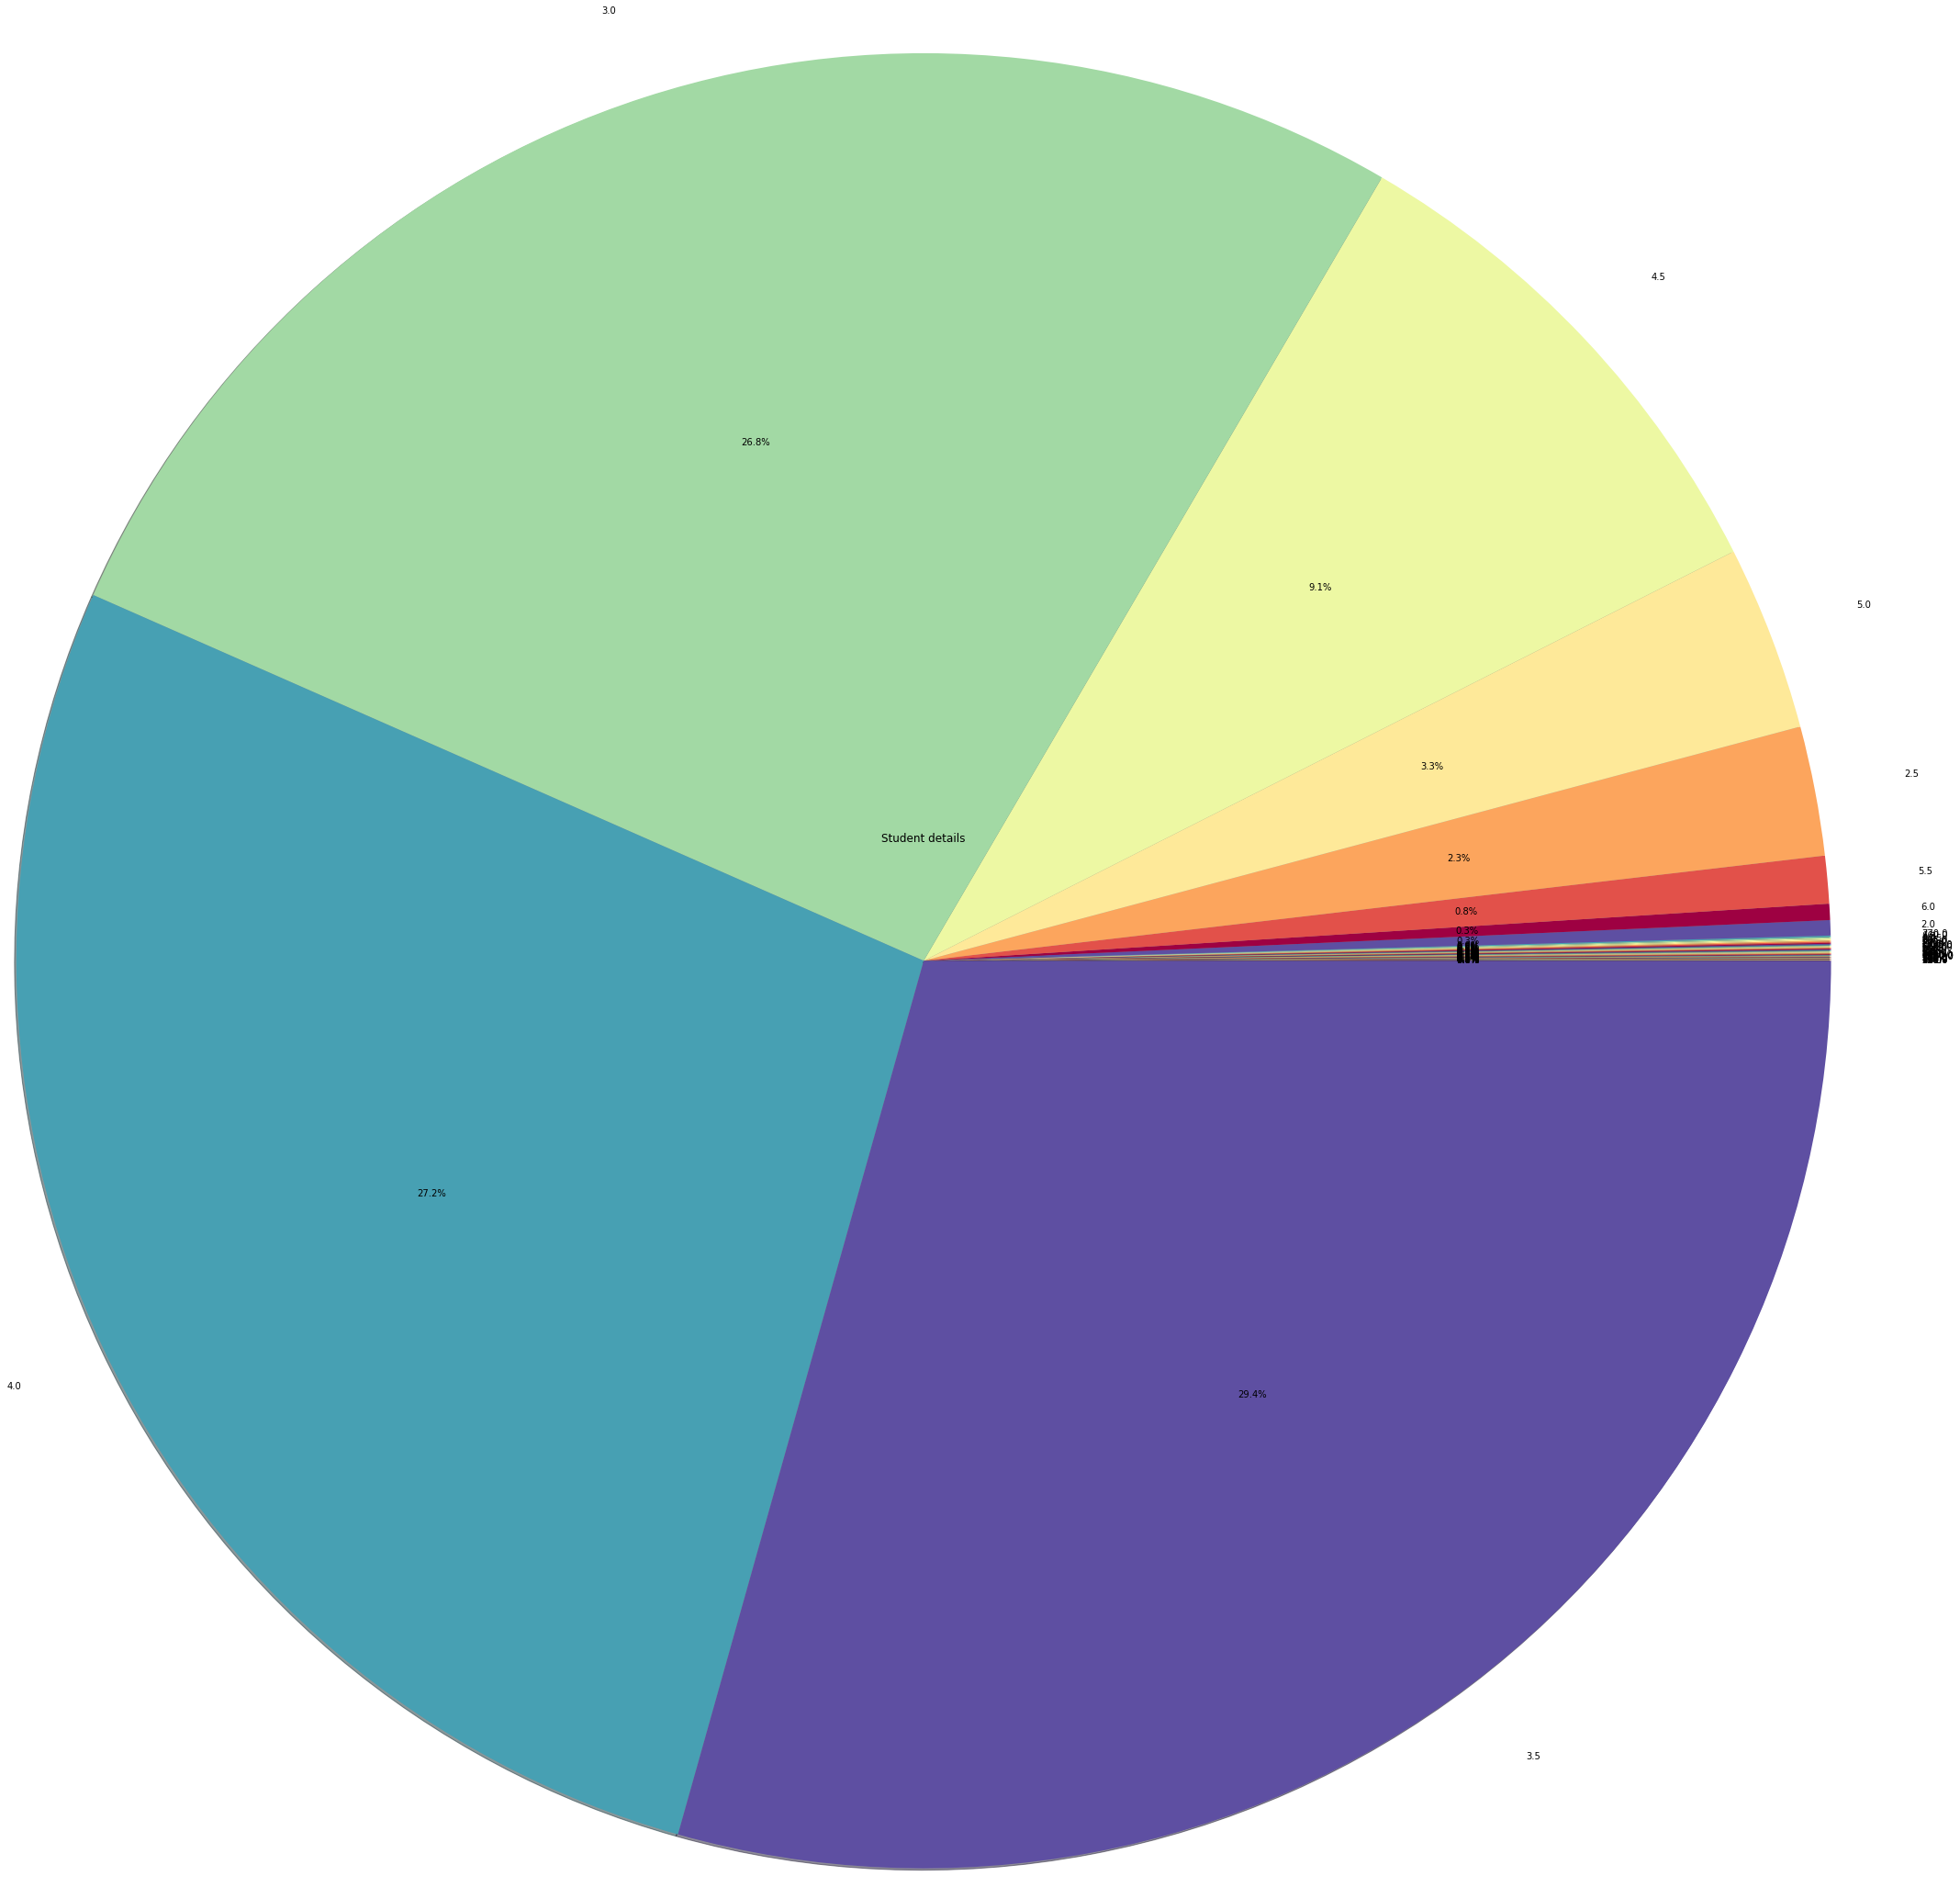

In [ ]:
plt.figure(1, figsize=(20,10)) 
the_grid = GridSpec(2, 2)
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
plt.subplot(the_grid[0, 1], aspect=1, title='Student details')
type_show_ids = plt.pie(student_counts, labels=student_labels, autopct='%1.1f%%', shadow=True, colors=colors, radius=10)
plt.show()

A scatter plot for 

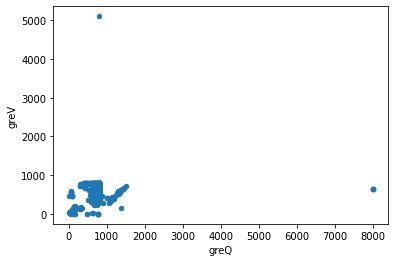

In [ ]:
quant_verbal = df_plots.plot.scatter(x='greQ', y='greV')


Distribution graphs (histogram/ bar graph) of column data:

A histogram is the most commonly used graph to depict the frequency distributions.

In [ ]:
def plotPerColumnDistribution(df_plots, nGraphShown, nGraphPerRow):
    nunique = df_plots.nunique()
    df_plots = df_plots[[col for col in df_plots if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df_plots.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df_plots.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

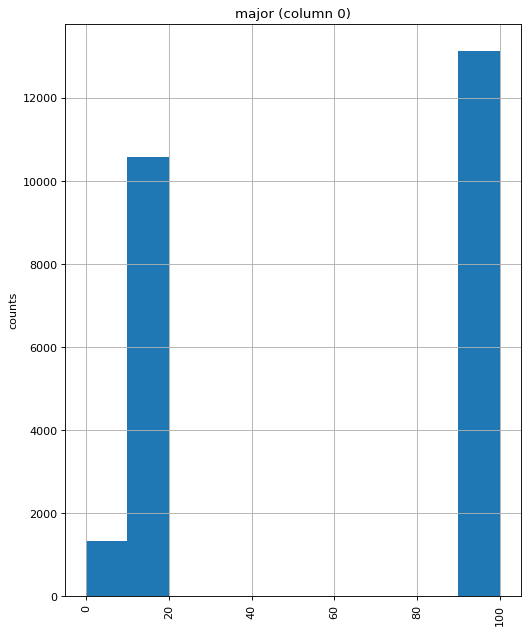

In [ ]:
plotPerColumnDistribution(df_plots, 10, 5)

In [ ]:
# Correlation matrix
def plotCorrelationMatrix(df_plots, graphWidth):
    df_plots.dataframeName = 'original_data.csv'
    filename = df_plots.dataframeName
    df_plots = df_plots.dropna('columns') # drop columns with NaN
    df_plots = df_plots[[col for col in df_plots if df_plots[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df_plots.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df_plots.shape[1]}) is less than 2')
        return
    corr = df_plots.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

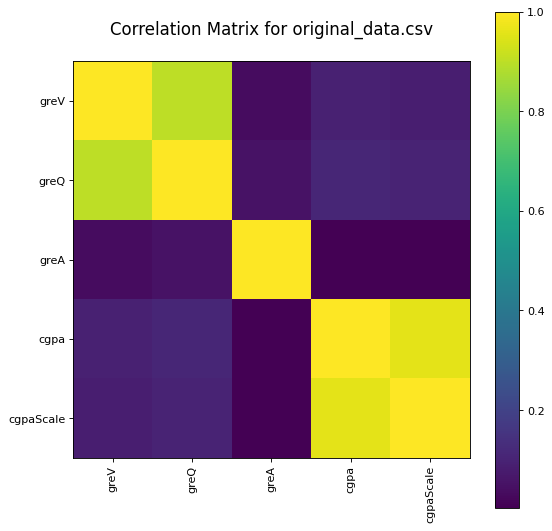

In [ ]:
plotCorrelationMatrix(df, 8)

**Scatter Plot:** 
It plots a graph for values of two variables of a set of data. It is useful in understanding the reationsip between each of the columns.

In [ ]:
def plotScatterMatrix(df_plots, plotSize, textSize):
    df_plots = df_plots.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df_plots = df_plots.dropna('columns')
    df_plots = df_plots[[col for col in df_plots if df_plots[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df_plots)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df_plots = df_plots[columnNames]
    ax = pd.plotting.scatter_matrix(df_plots, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df_plots.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

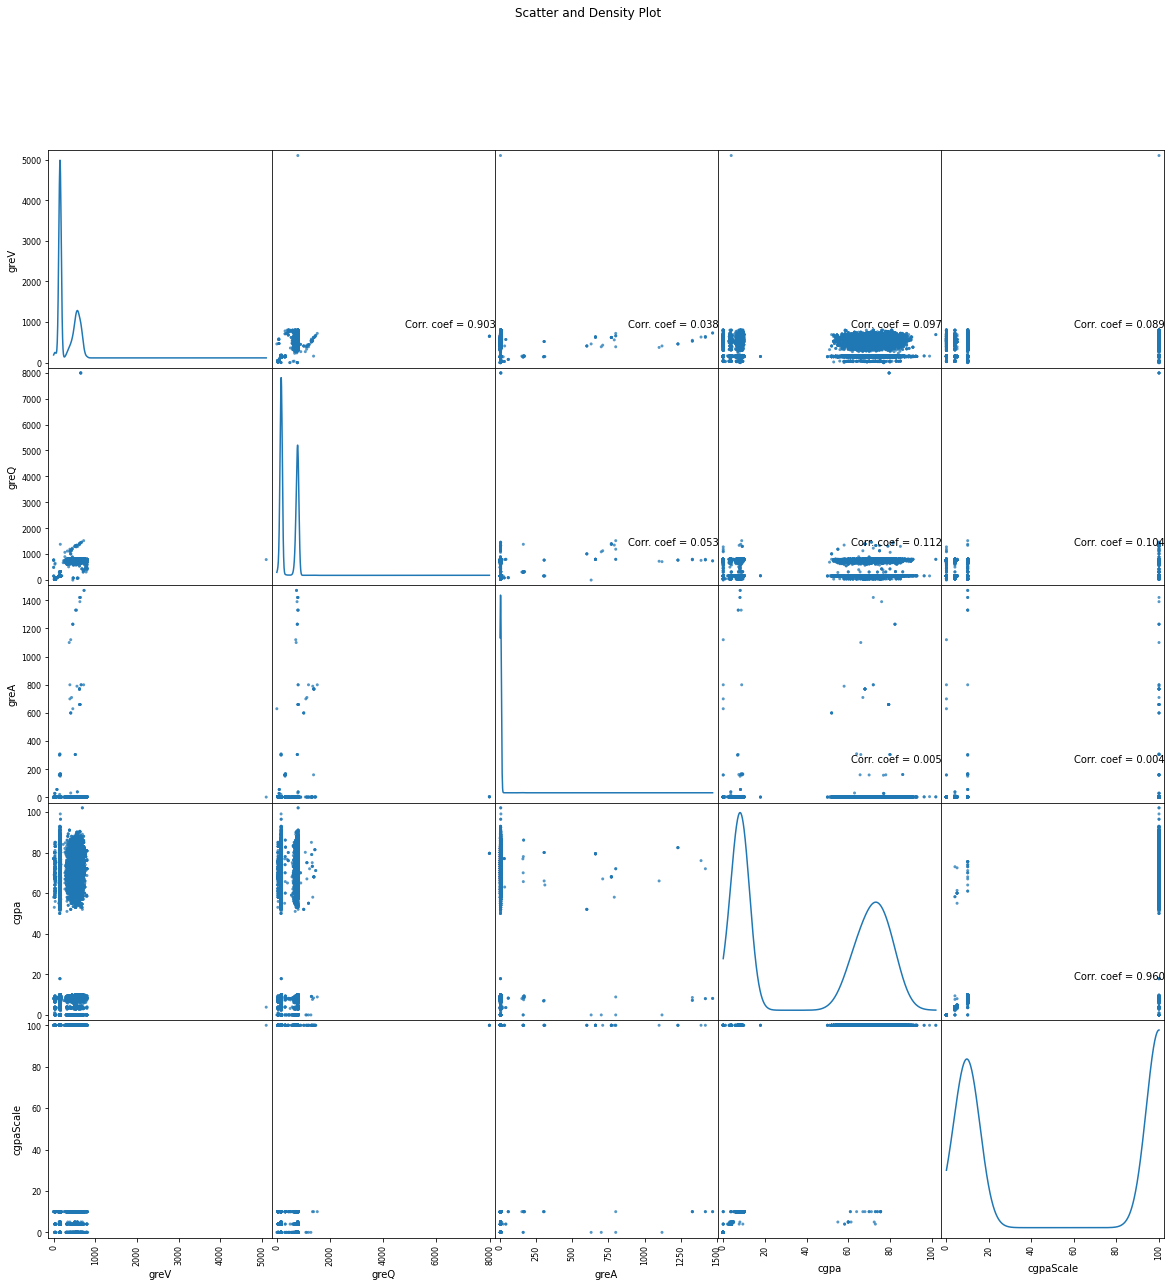

In [ ]:
plotScatterMatrix(df_plots, 20, 10)

Using word cloud to find high frequency words in the dataset and representing it pictorially.

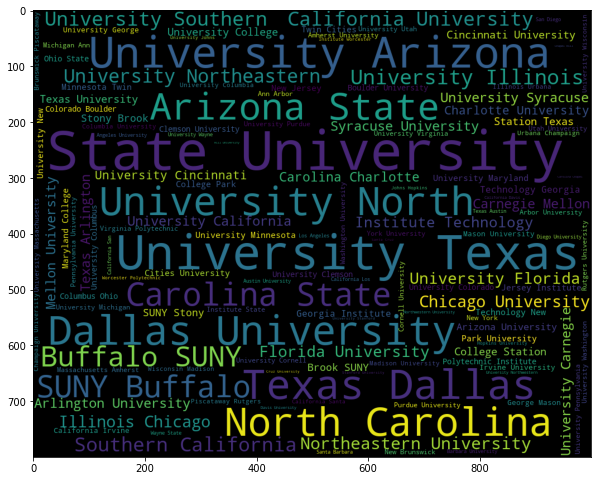

In [ ]:
from wordcloud import WordCloud                      # For using the wordcloud to find high frequency words
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(width = 1000, height = 800).generate(" ".join(df_plots.univName.astype(str)))
plt.figure(figsize = (10, 10))
plt.imshow(wordcloud)
plt.show()

**Bar graph:** 
A bar graph is a graph that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent. The bars can be plotted vertically or horizontally. 

In the below graphs we are plotting the admits of students againts their majors. 



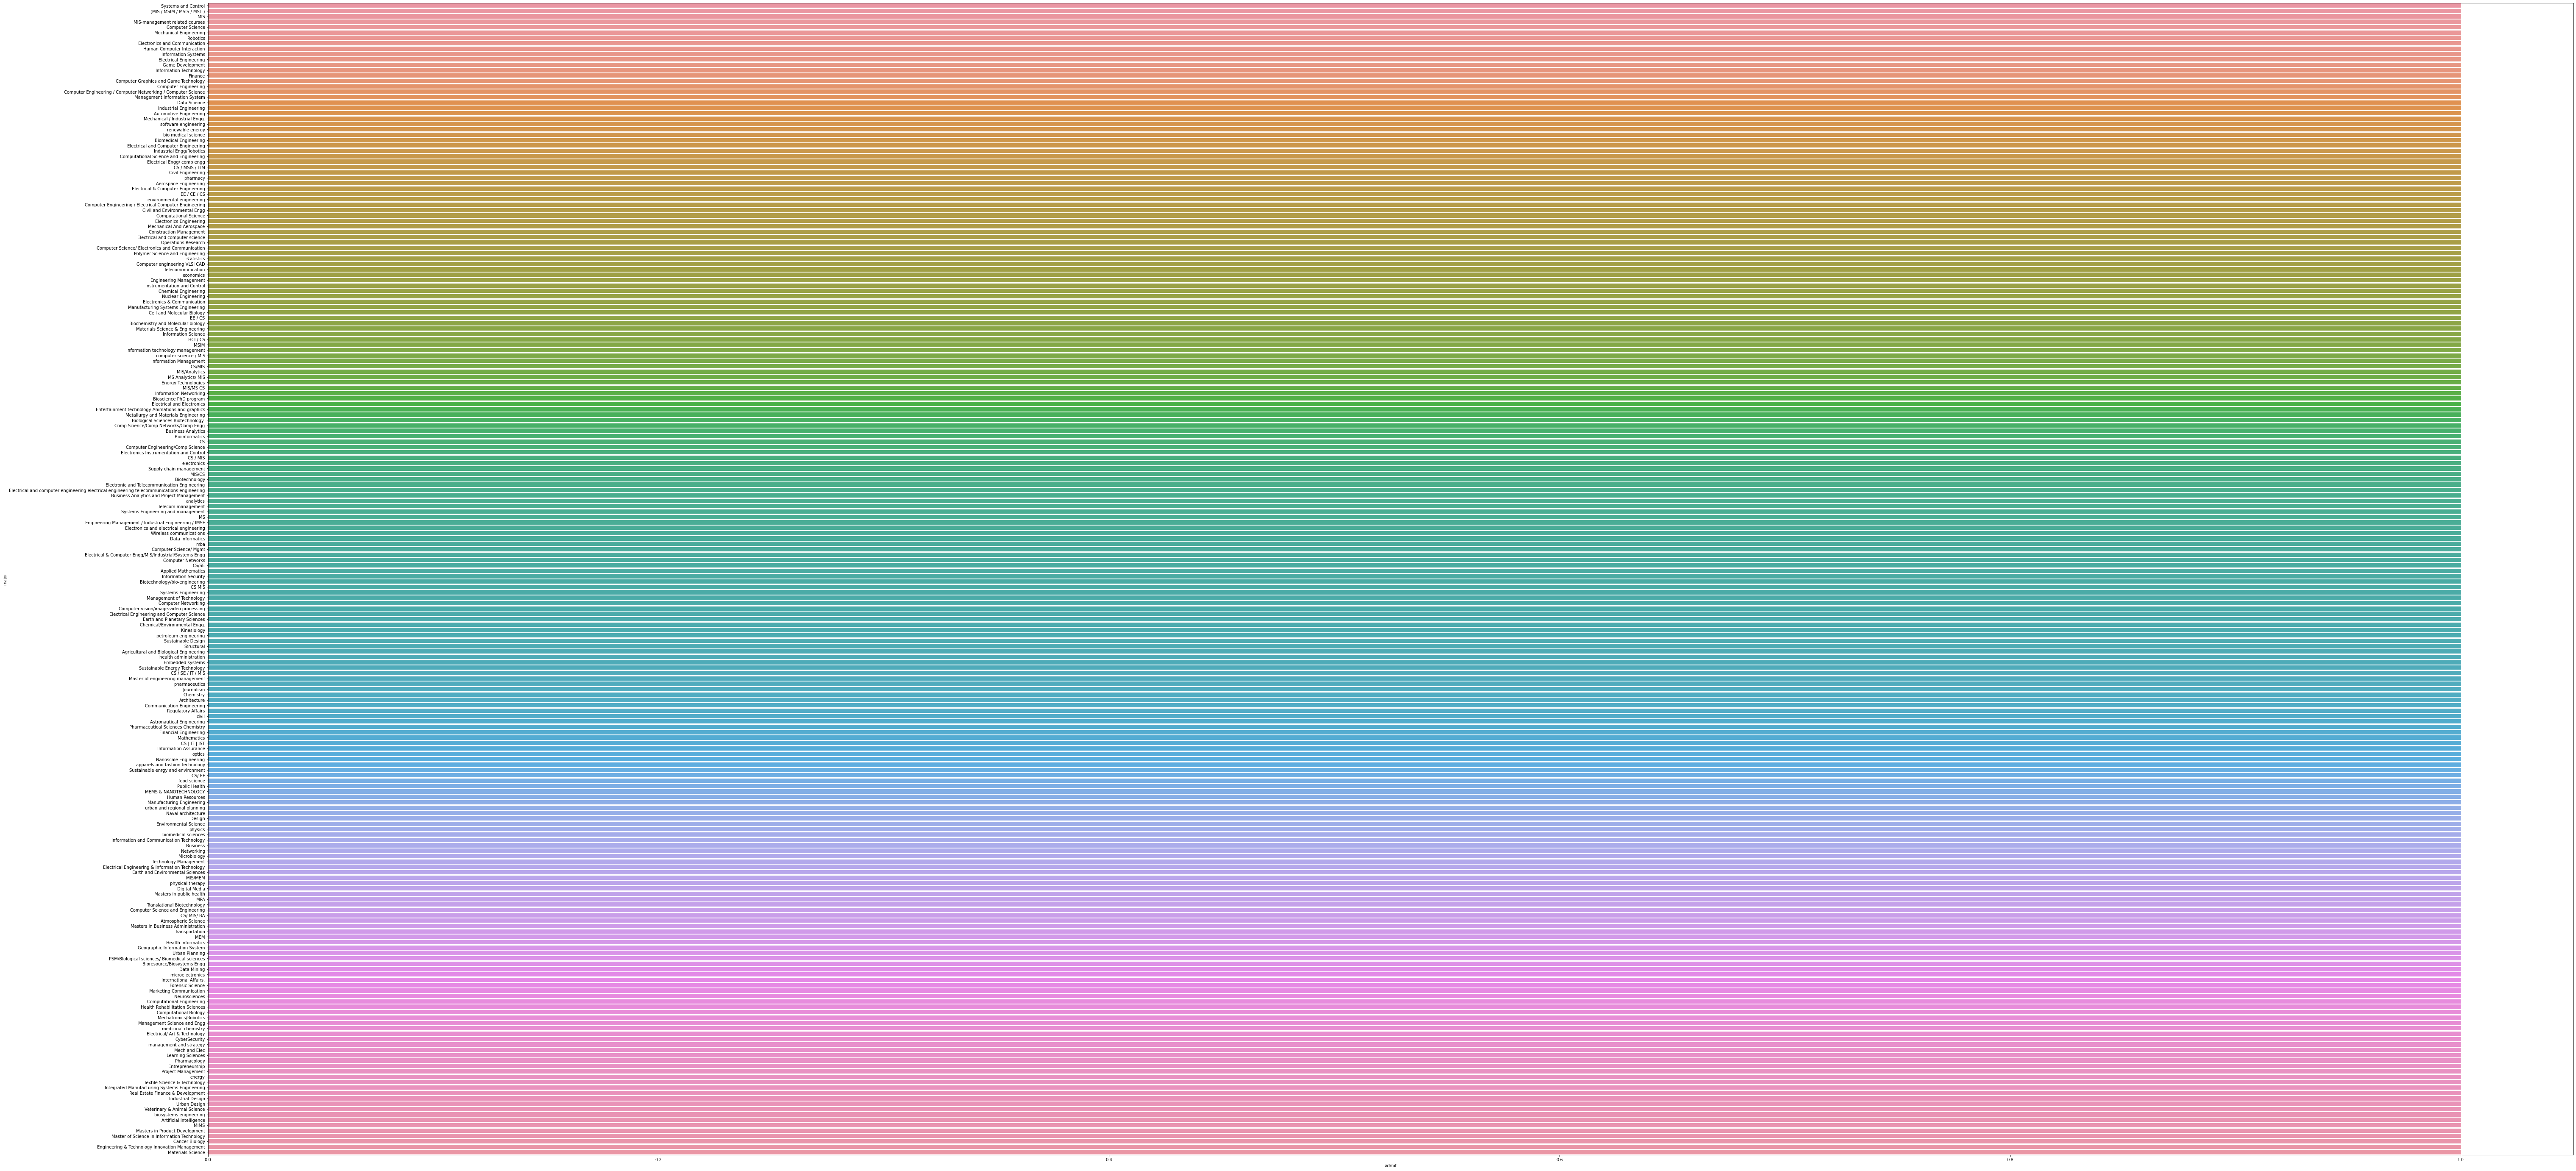

In [ ]:
plt.figure(figsize=(100,50))
sns.barplot(x='admit',y='major',data=df_plots)

**Heatmap:**
It is a graphical representation of data where values are depicted by color. Heatmaps are useful in cross-examining multivariate data. It shows the variance across each variable and from that we can detect the similarities and correlations between the variables.

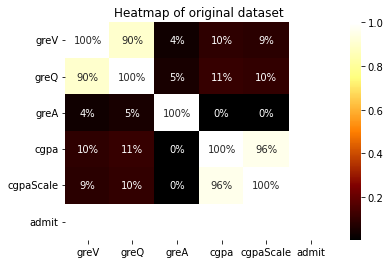

In [ ]:
#plt.figure(figsize=(50,30))
sns.heatmap(df_plots.corr(),annot=True, fmt='.0%',cmap='afmhot')
plt.title("Heatmap of original dataset")
plt.show()

**GRE old vs new score graphical representation:**
The new scores for GRE Verbal and Quant are less than or equal to 170 as shown in the graph.

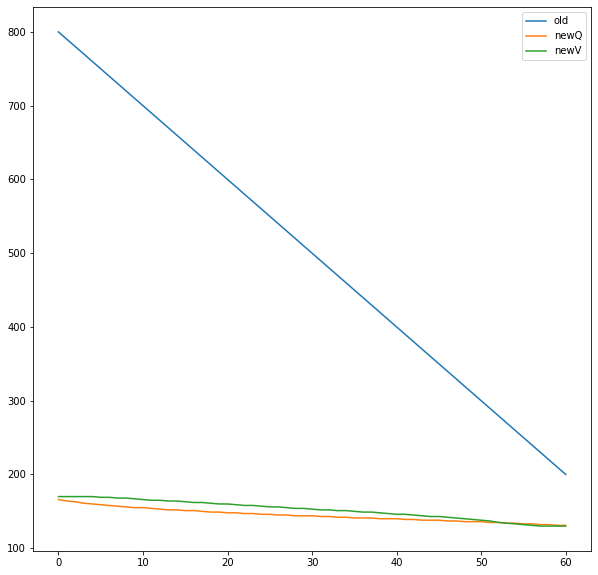

In [ ]:
score_table.plot(figsize=(10, 10))

# **DATA NORMALIZATION**

**CGPA** **Normalization**:
As we noticed that the CGPA scale was not consistent throughout the dataset as few people have the cgpa scale out of 100 and others have 10 based on their unviersities. Hence we decided to noramlize the cgpa.



In [ ]:
def normalize_gpa(df, cgpa, totalcgpa):
    '''
    Utility function to normalize CGPA
    '''
    cgpa = df[cgpa].tolist()
    totalcgpa = df[totalcgpa].tolist()
    for i in range(len(cgpa)):
        if totalcgpa[i] != 0:
            cgpa[i] = cgpa[i] / totalcgpa[i] 
            cgpa[i] = round(cgpa[i] * 10, 2)
        else:
            cgpa[i] = 0
    df["cgpa"] = cgpa
    return df

In [ ]:
normalize_gpa(df, 'cgpa', 'cgpaScale')

major  ...  admit
0             Systems and Control  ...      1
2      (MIS / MSIM / MSIS / MSIT)  ...      1
4                             MIS  ...      1
5                             MIS  ...      1
6                             MIS  ...      1
...                           ...  ...    ...
52585      Biomedical Engineering  ...      1
52586            Computer Science  ...      1
52587            Computer Science  ...      1
52588      Electrical Engineering  ...      1
52589      Electrical Engineering  ...      1

[25033 rows x 9 columns]

In [ ]:
df['cgpaScale'].replace(100, 10, inplace=True)
display(df)

major  ...  admit
0             Systems and Control  ...      1
2      (MIS / MSIM / MSIS / MSIT)  ...      1
4                             MIS  ...      1
5                             MIS  ...      1
6                             MIS  ...      1
...                           ...  ...    ...
52585      Biomedical Engineering  ...      1
52586            Computer Science  ...      1
52587            Computer Science  ...      1
52588      Electrical Engineering  ...      1
52589      Electrical Engineering  ...      1

[25033 rows x 9 columns]

# **FEATURE EXTRACTION**

The main goal of feature extraction is to identify the key features are that required to enhance the classifier's performance. Below is the function to preprocess categorical features. 

In [ ]:
def feature_extraction_categorical_variable1(df, feature):
    feature_list = list(df[feature].astype(str))
    student_id_for_feature = defaultdict(list)
    for i in range(len(feature_list)):
        feature_list[i] = str(feature_list[i])
        feature_list[i] = feature_list[i].strip()
        feature_list[i] = feature_list[i].replace("-", "")
        feature_list[i] = feature_list[i].replace(".", "")
        feature_list[i] = feature_list[i].partition("/")[0]
        feature_list[i] = feature_list[i].partition("(")[0]
    df[feature] = feature_list
    return df

Converting old GRE scores to new format of GRE scores which should be <= 170.

In [ ]:
def scoreConversion(feature):
    gre_score = list(df[feature])
    for i in range(len(gre_score)):
        if gre_score[i] > 170:
            try:
                if feature =='greV':
                    gre_score[i]=score_table['newV'][gre_score[i]]
                elif feature == 'greQ':
                    gre_score[i]=score_table['newQ'][gre_score[i]]
            except:
                continue
    return gre_score

Preprocessing each column:

In [ ]:
df = feature_extraction_categorical_variable1(df, "univName")
df['univName'] = df['univName'].astype('category')
df['univ_College_code'] = df['univName'].cat.codes # Generates cat codes for major

df = feature_extraction_categorical_variable1(df, "major")
df['major'] = df['major'].astype('category')
df['major_code'] = df['major'].cat.codes # Generates cat codes for major
      
df['greV'] = df['greV'].astype('Int64')
df['greQ'] = df['greQ'].astype('Int64')
score_table.set_index(['old'],inplace=True)
df['greV'] = scoreConversion('greV')
df['greQ'] = scoreConversion('greQ')
df = df[df['greV']<=170]
df = df[df['greQ']<=170]
df = df[df['cgpaScale']==10]
df = df[df['greA']<=6]
df = df[df['cgpa']<=10]
print(df)

                               major  greV  ...  univ_College_code  major_code
0                Systems and Control   160  ...                 50         160
2                                      146  ...                 50           0
4                                MIS   148  ...                 50         111
6                                MIS   150  ...                 50         111
7      MISmanagement related courses   147  ...                 50         112
...                              ...   ...  ...                ...         ...
52585         Biomedical Engineering   151  ...                  0          12
52586               Computer Science   159  ...                  0          41
52587               Computer Science   158  ...                  0          41
52588         Electrical Engineering   150  ...                  0          59
52589         Electrical Engineering   161  ...                  0          59

[23557 rows x 11 columns]


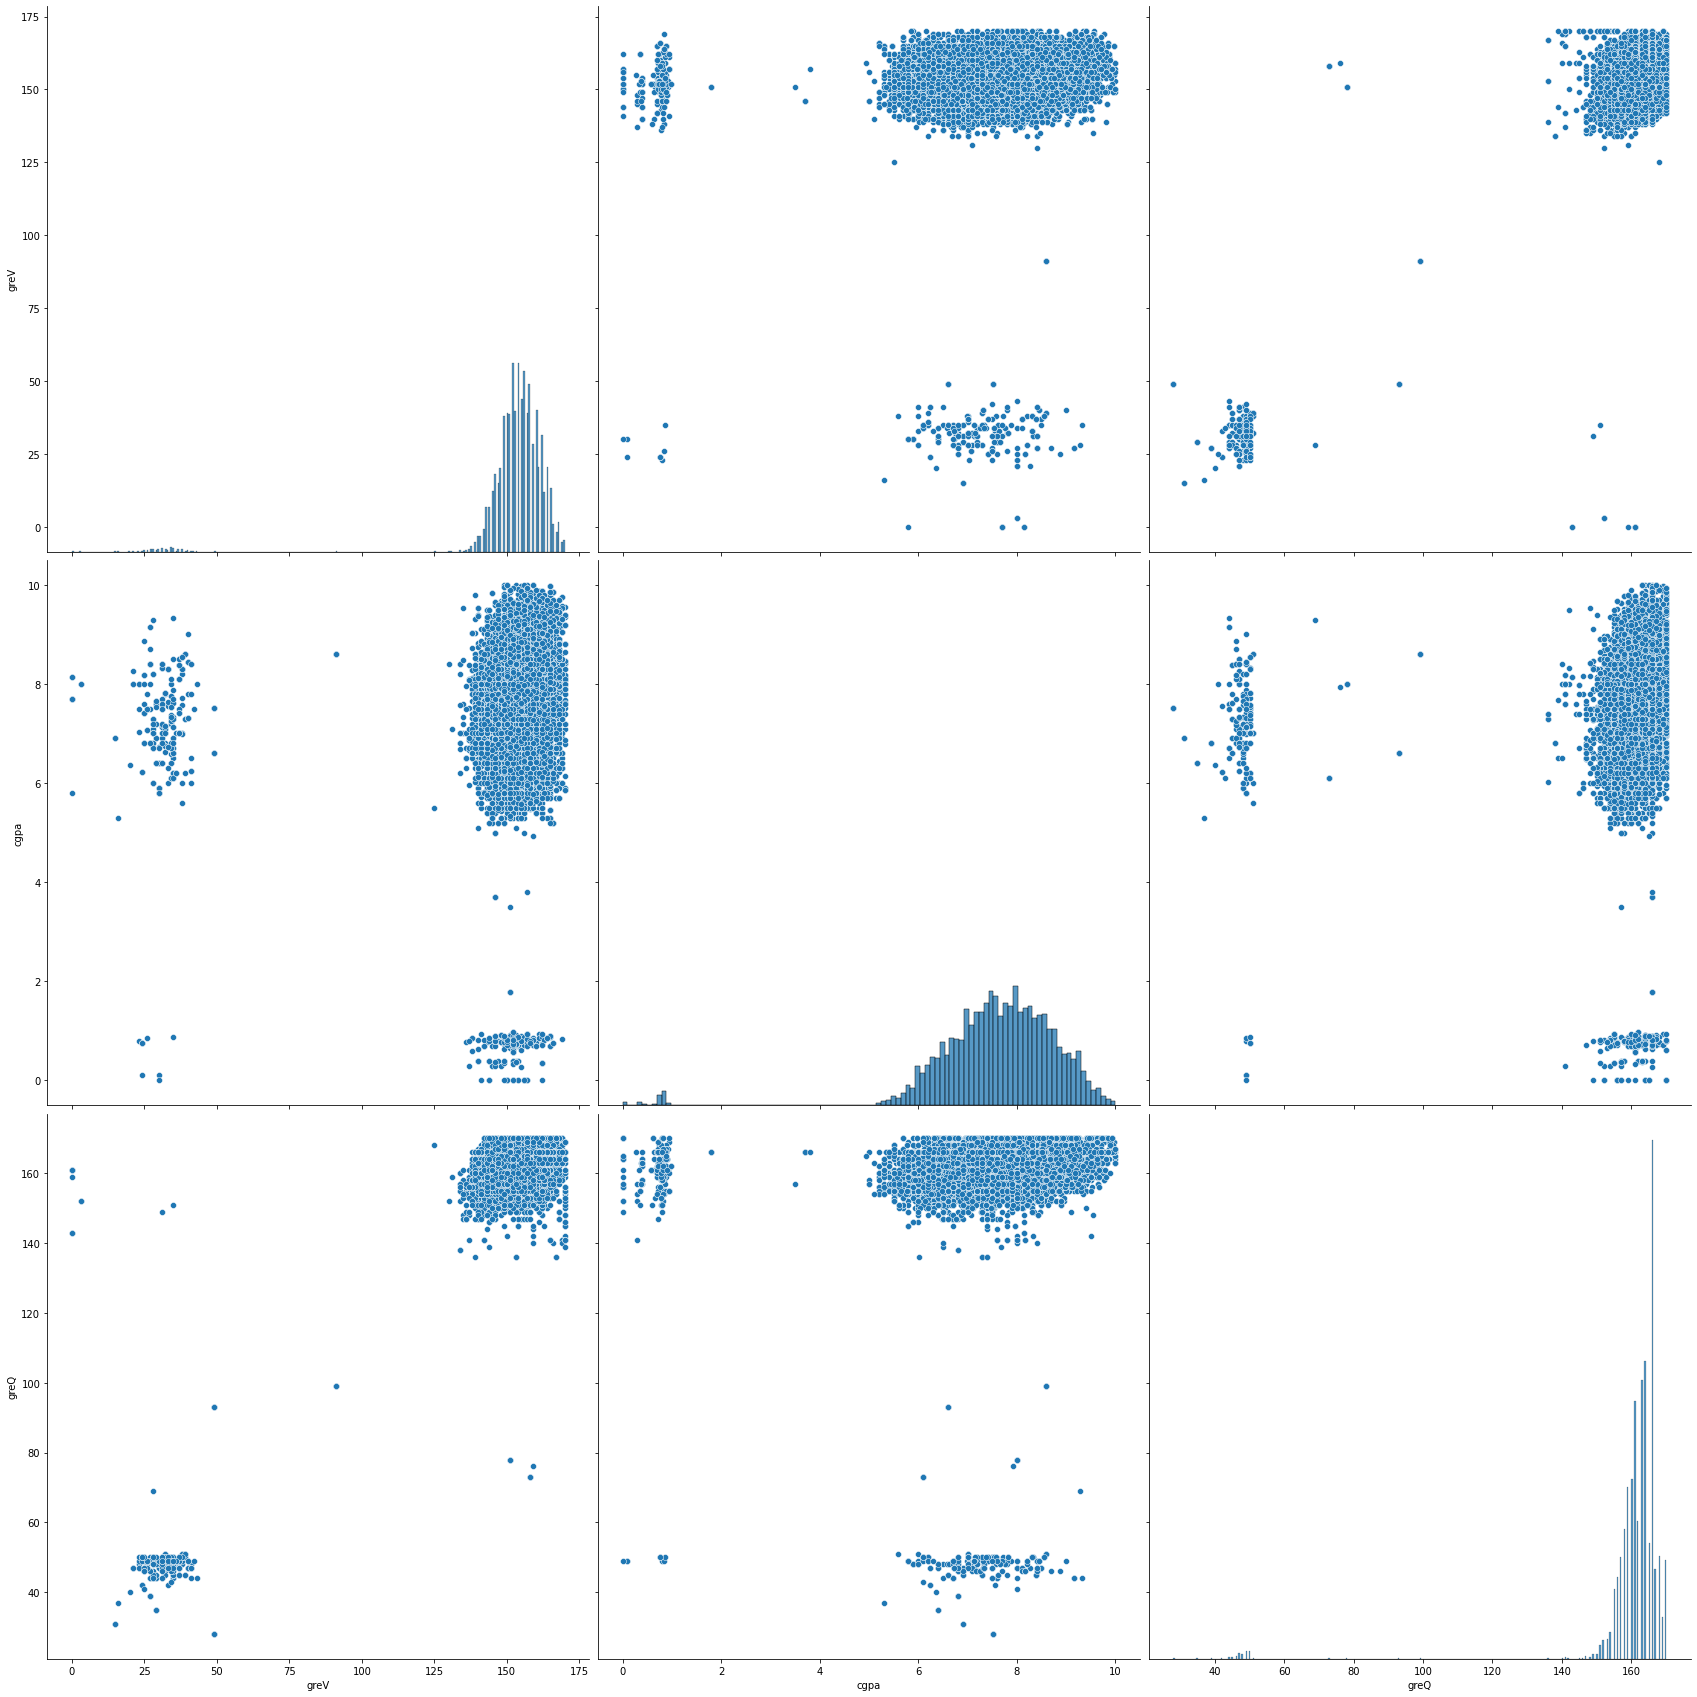

In [ ]:
sns.pairplot(df, palette="husl", x_vars=["greV","cgpa","greQ"], y_vars=["greV","cgpa","greQ"], height=8)
plt.show()

In [ ]:
display(df)

major  greV  ...  univ_College_code  major_code
0                Systems and Control   160  ...                 50         160
2                                      146  ...                 50           0
4                                MIS   148  ...                 50         111
6                                MIS   150  ...                 50         111
7      MISmanagement related courses   147  ...                 50         112
...                              ...   ...  ...                ...         ...
52585         Biomedical Engineering   151  ...                  0          12
52586               Computer Science   159  ...                  0          41
52587               Computer Science   158  ...                  0          41
52588         Electrical Engineering   150  ...                  0          59
52589         Electrical Engineering   161  ...                  0          59

[23557 rows x 11 columns]

# **MODELING**

Our model is built to shortlist the best universities, out of the 54 universities from the dataset, based on the student's profile. In this project we are using two classification algorithms: Random Forest Classifier and K-Nearest Neighbor algorithm. These algorithms were built using a combination of all the features mentioned above, to classify a student's profile to the best university among the 54 universities. 

##**RANDOM FOREST CLASSIFIER**

Random Forest algorithm is a supervised machine learning algorithm. It uses ensemble learning technique, which means it combines the output of various classifiers to provide solution to complex problems. Random forest algorithm consists of huge number of decision trees and each decision tree gives out a class prediction and the class with the most number of votes automatically becomes the model's prediction. 

Tha data was split as 70% training set and 30% testing set. 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import neighbors, svm,metrics


X = df.drop(['univName','major','ugCollege','cgpaScale'],1) # Features
y = df['univName'] #Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0) # 70% training and 30% test

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=500)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

Below is the accuracy of the Random Forest Classifier using which we are evaluating the performance of the algorithm. 

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8036219581211093


Below is the prediction of the Random Forest Classifier based on the input given by the user like GRE score (Quant, Verbal & AWA), CGPA, etc. 

In [ ]:
pd.DataFrame(clf.predict([[150,150,4.0,8.20,1,40,131]])) #correct prediction but given exact details

0
0  University of North Carolina Charlotte

##**SUPPORT VECTOR MACHINE**

Support Vector Machine is used for classification of both linear and non-linear problems. We plot each data item as a point in n-dimensional space (where n is the number of features we have) with the value of each feature being the value of a particular cordinate. Later on the classification is performed bby finding the hyper-plane that differentiates the two classes.

In [ ]:
# # Support Vector Classifier
clf = svm.SVC()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.35681946802490094


In [ ]:
pd.DataFrame(clf.predict([[160,160,5.5,9.20,1,40,131]])) #correct prediction but given exact detail

0
0  University of Texas Dallas

##**K - NEAREST NEIGHBOURS**

K-Nearest Neighbor algorithm is a supervised algorithm that assumes similar things exist in close proximity. A object is classified by majority vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors.  

In [ ]:
# #K-Nearest Neighbours
clf = neighbors.KNeighborsClassifier(1000, weights='uniform')
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [ ]:
# # Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.32710809281267683


In [ ]:
knn_data = df[['greV', 'greQ', 'greA', 'cgpa', 'univName']]
knn_data.head()

knn_data.to_csv('sample_data/drive/MyDrive/knn_data.csv')

**Calculating distance between dataset and normalise gpa**

In [ ]:
def euclideanDistance(data1, df, length):
    distance = 0
    for x in range(length):
        distance += np.square(data1[x] - df[x])
    return np.sqrt(distance)

def knn(trainingSet, testInstance, k):
    print(k)
    distances = {}
    sort = {}
    length = testInstance.shape[1]

    for x in range(len(trainingSet)):

        dist = euclideanDistance(testInstance, trainingSet.iloc[x], length)
        
        distances[x] = dist[0]

    sorted_d = sorted(distances.items(), key=lambda x: x[1])

 
    neighbors = []

    for x in range(k):
        neighbors.append(sorted_d[x][0])

    classVotes = {}

    for x in range(len(neighbors)):
        response = trainingSet.iloc[neighbors[x]][-1]
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1

    sortedVotes = sorted(classVotes.items(), key=lambda x: x[1], reverse=True)
 
    return(sortedVotes, neighbors)


In [ ]:
testSet = [[150, 130, 6.0, 9]]
test = pd.DataFrame(testSet)
test.shape

(1, 4)

In [ ]:
k = 7

result,neigh= knn(knn_data, test, k)

list1 = []
list2 = []
for i in result:
    list1.append(i[0])
    list2.append(i[1])
for i in list1:
    print(i)
    

7
University of Texas Arlington
University of Florida
Texas A and M University College Station
Wayne State University
New York University
University of North Carolina Charlotte
University of California Davis


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(knn_data.iloc[:,0:4], df['univName'])

print(neigh.predict(testSet))

['New York University']


# **USER INTERFACE**


We have used inputs like GRE score (Quant, Verbal & AWA) and CGPA from the user and are displaying the top 5 universities for that particular profile. In the end, we are also displaying the top best university among the top 5 universities.  

**SAMPLE UI CODE :**

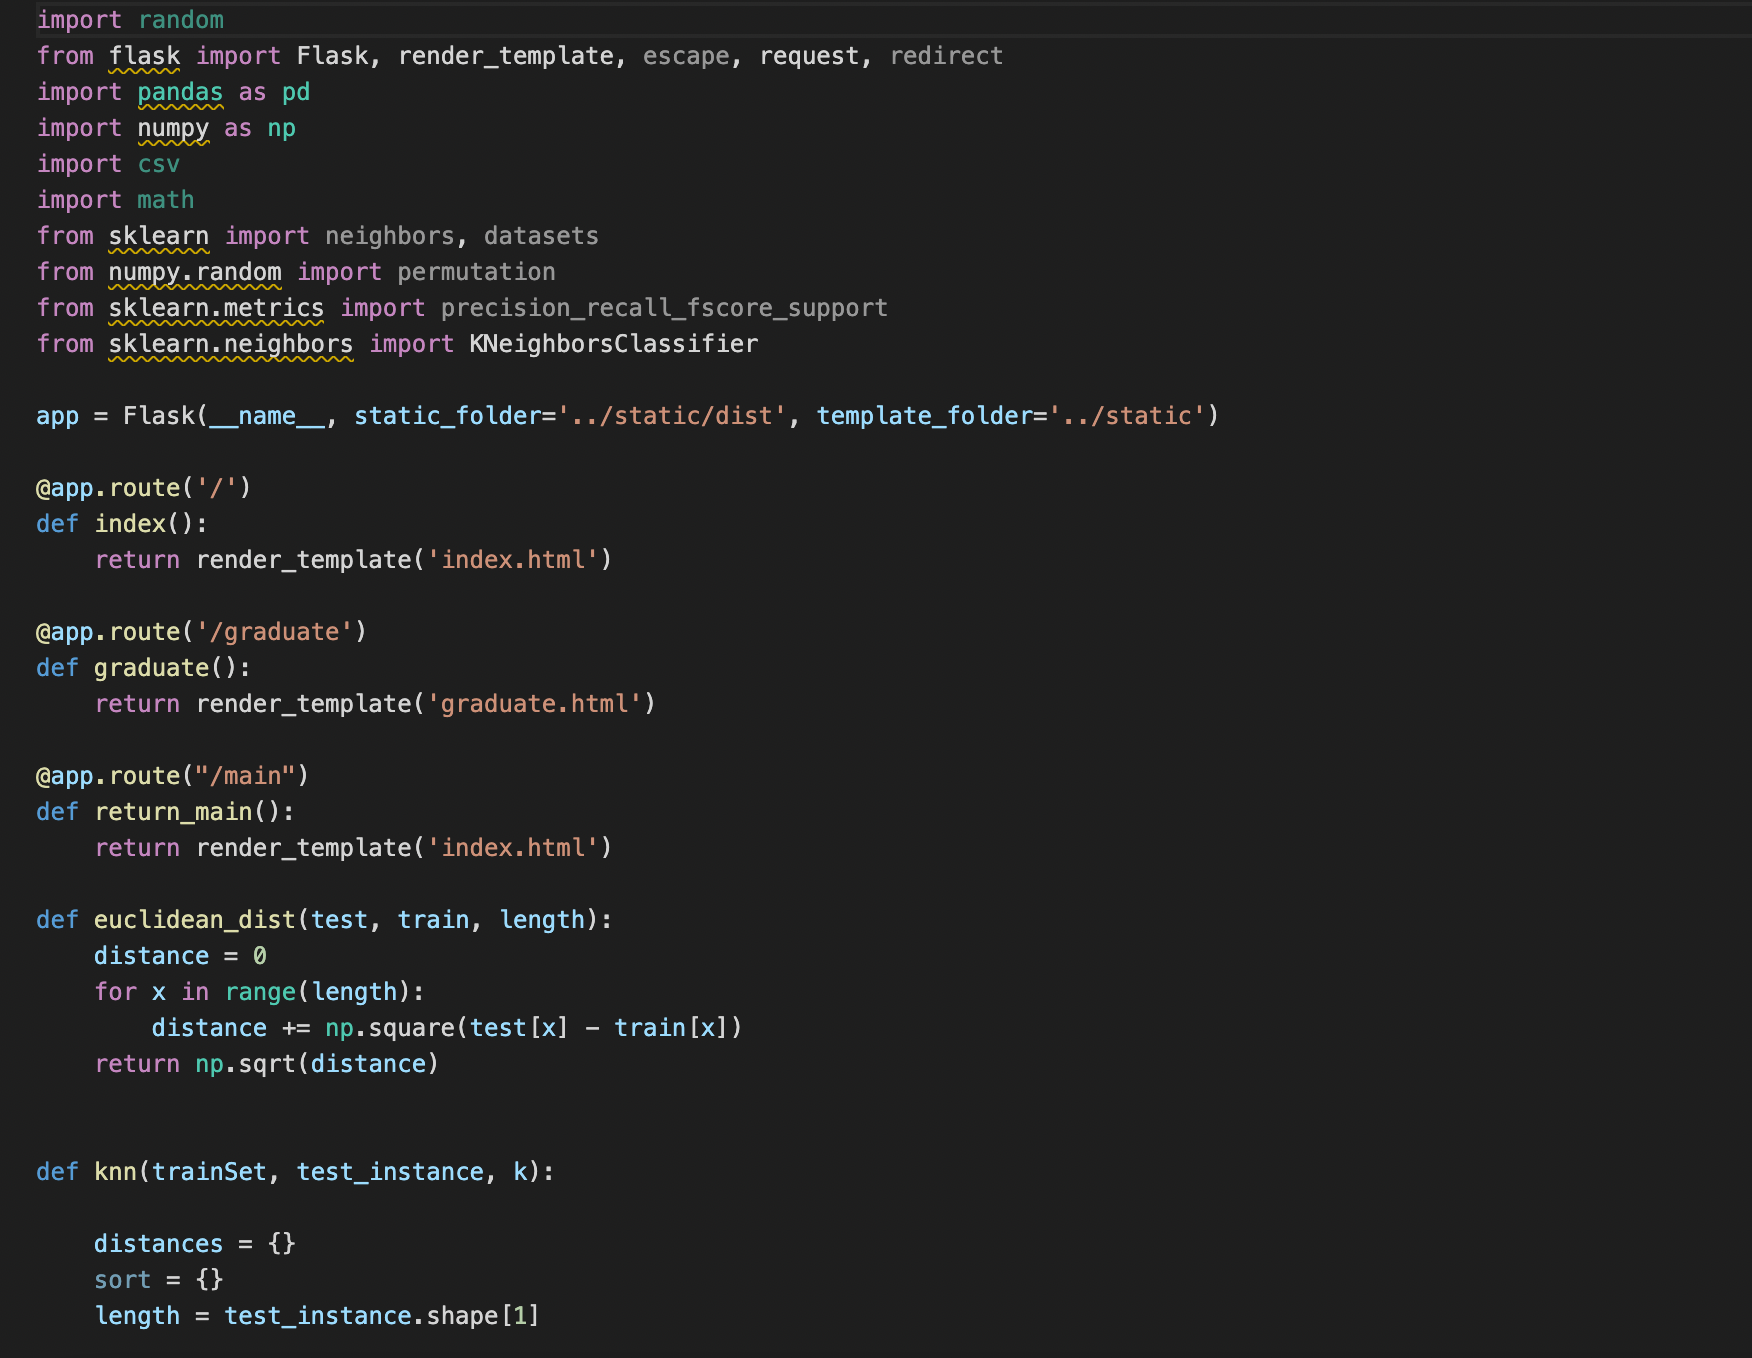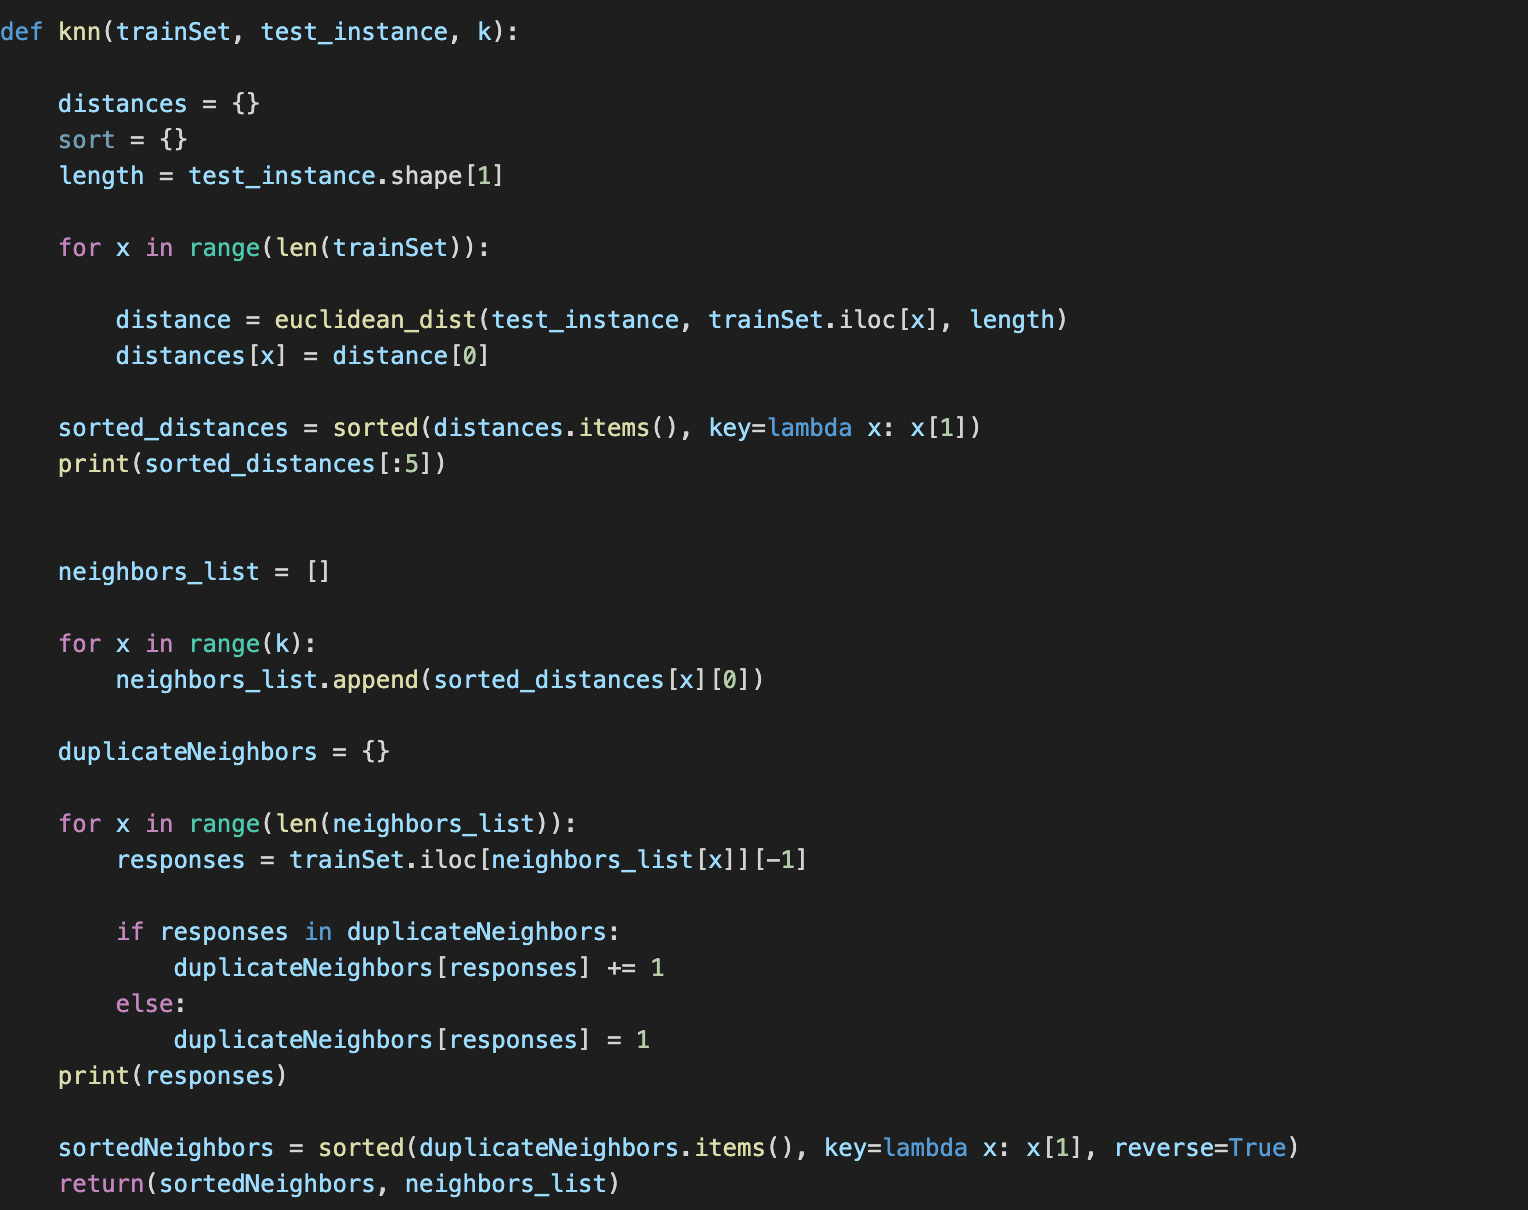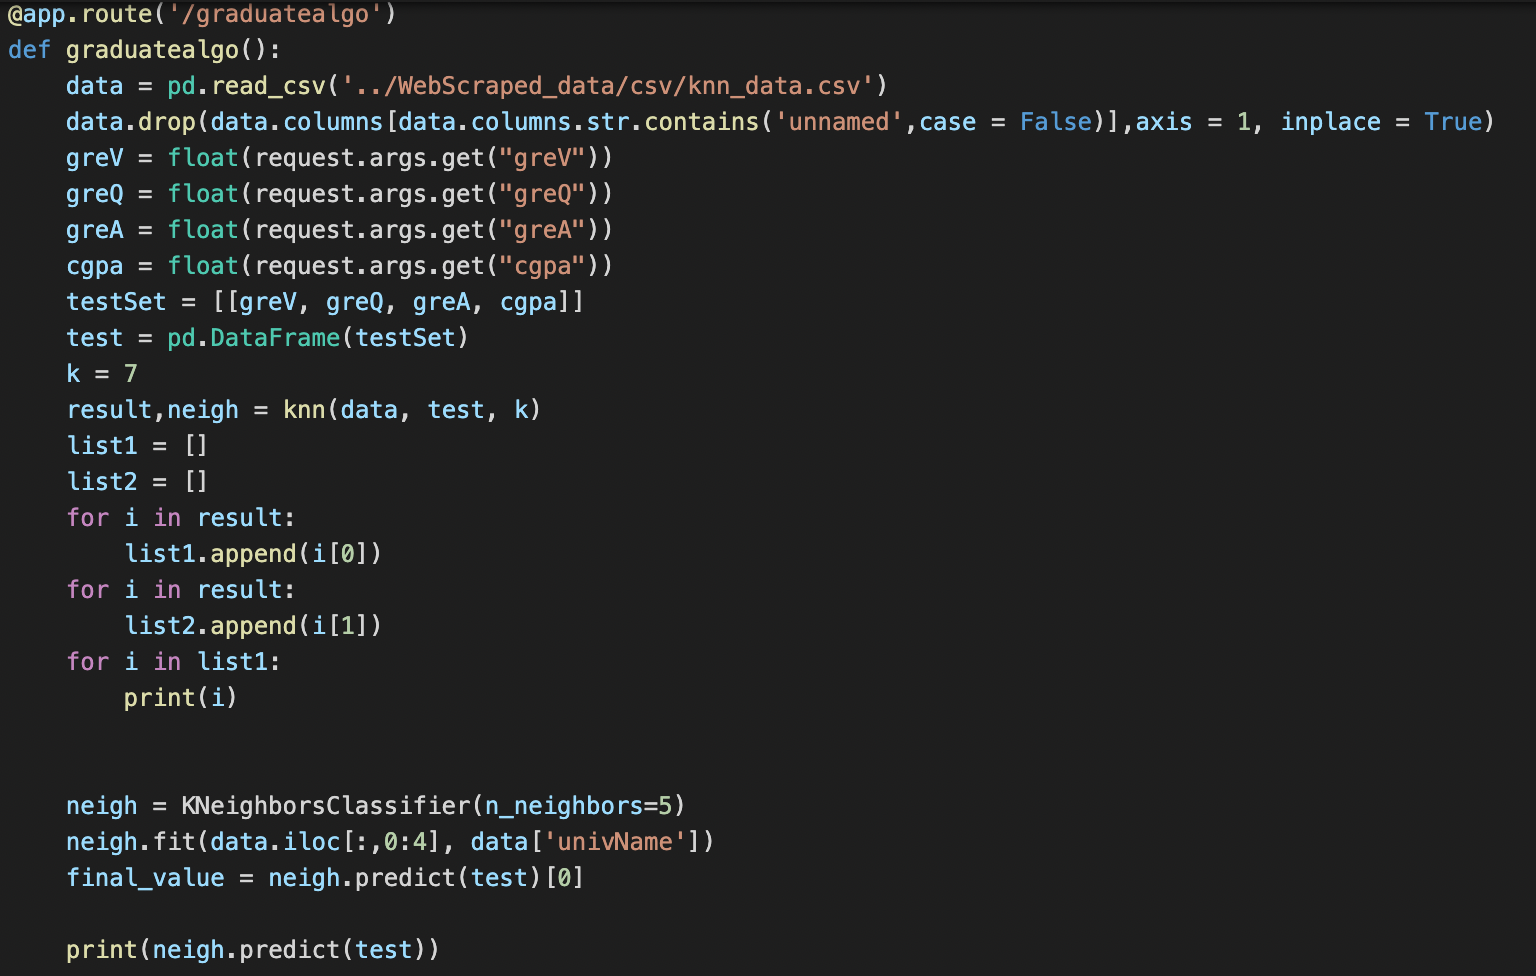

This is the home page of the website running on our local host.

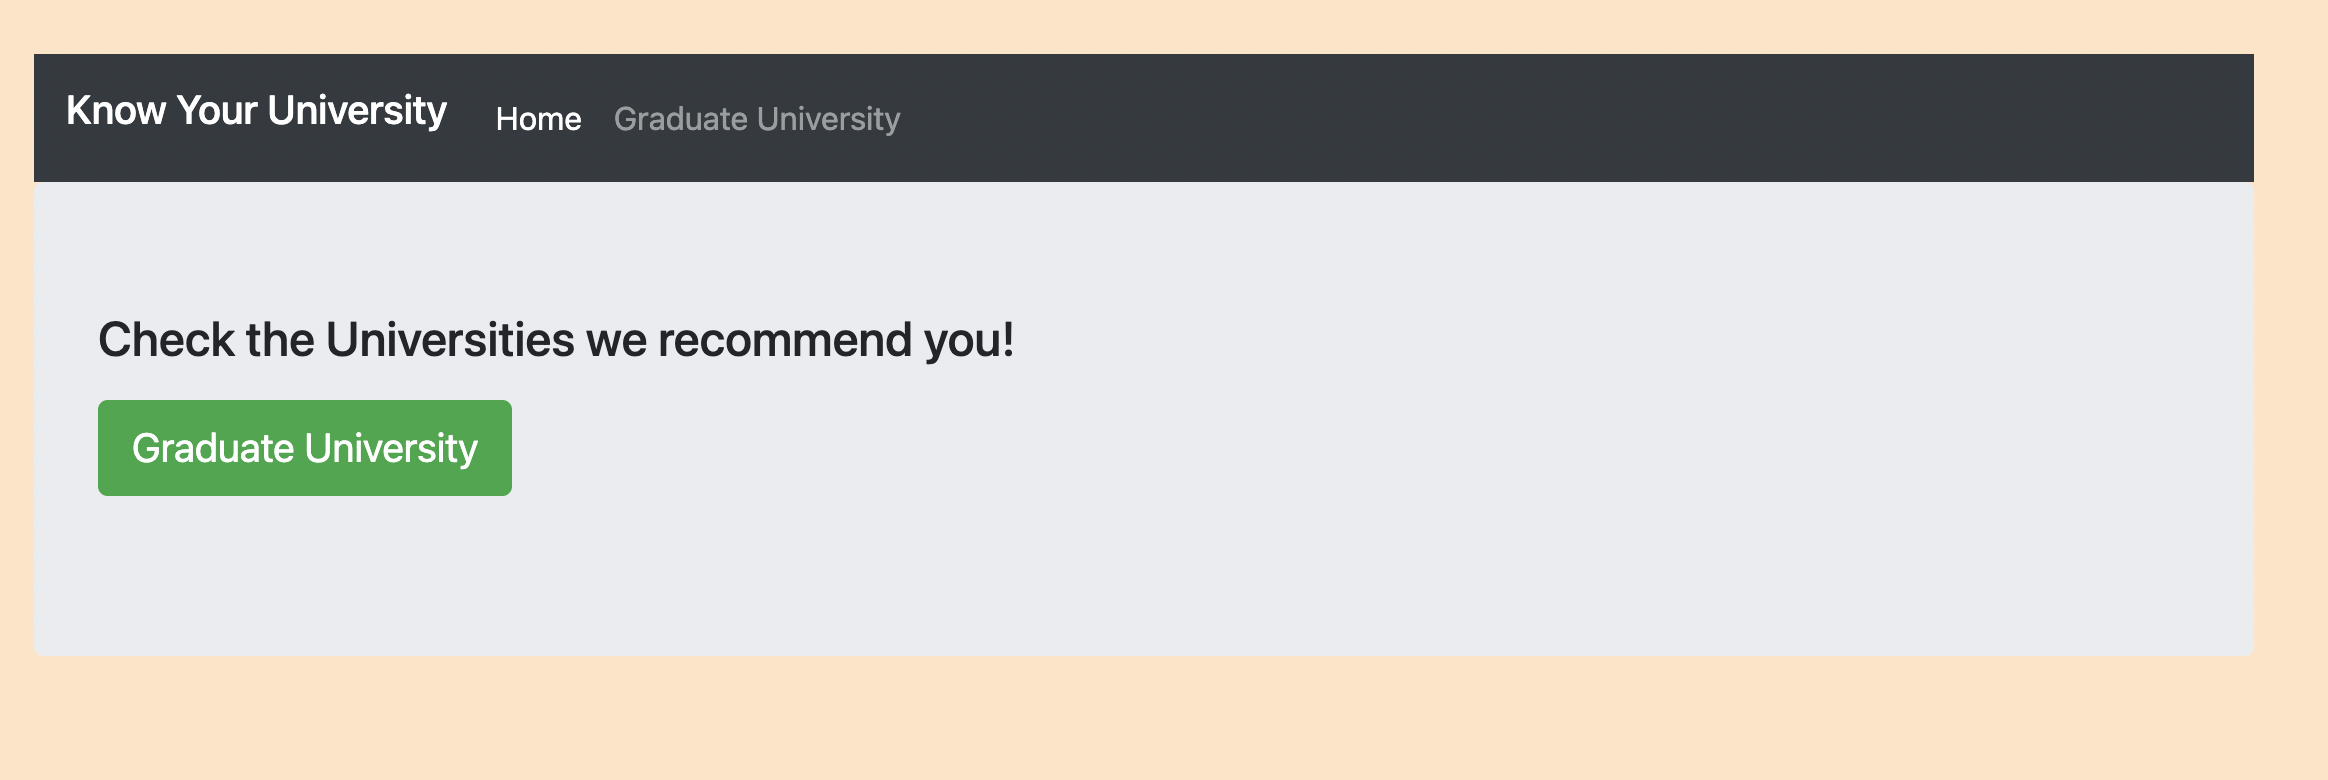

After clicking on the graduate university this page pops up.

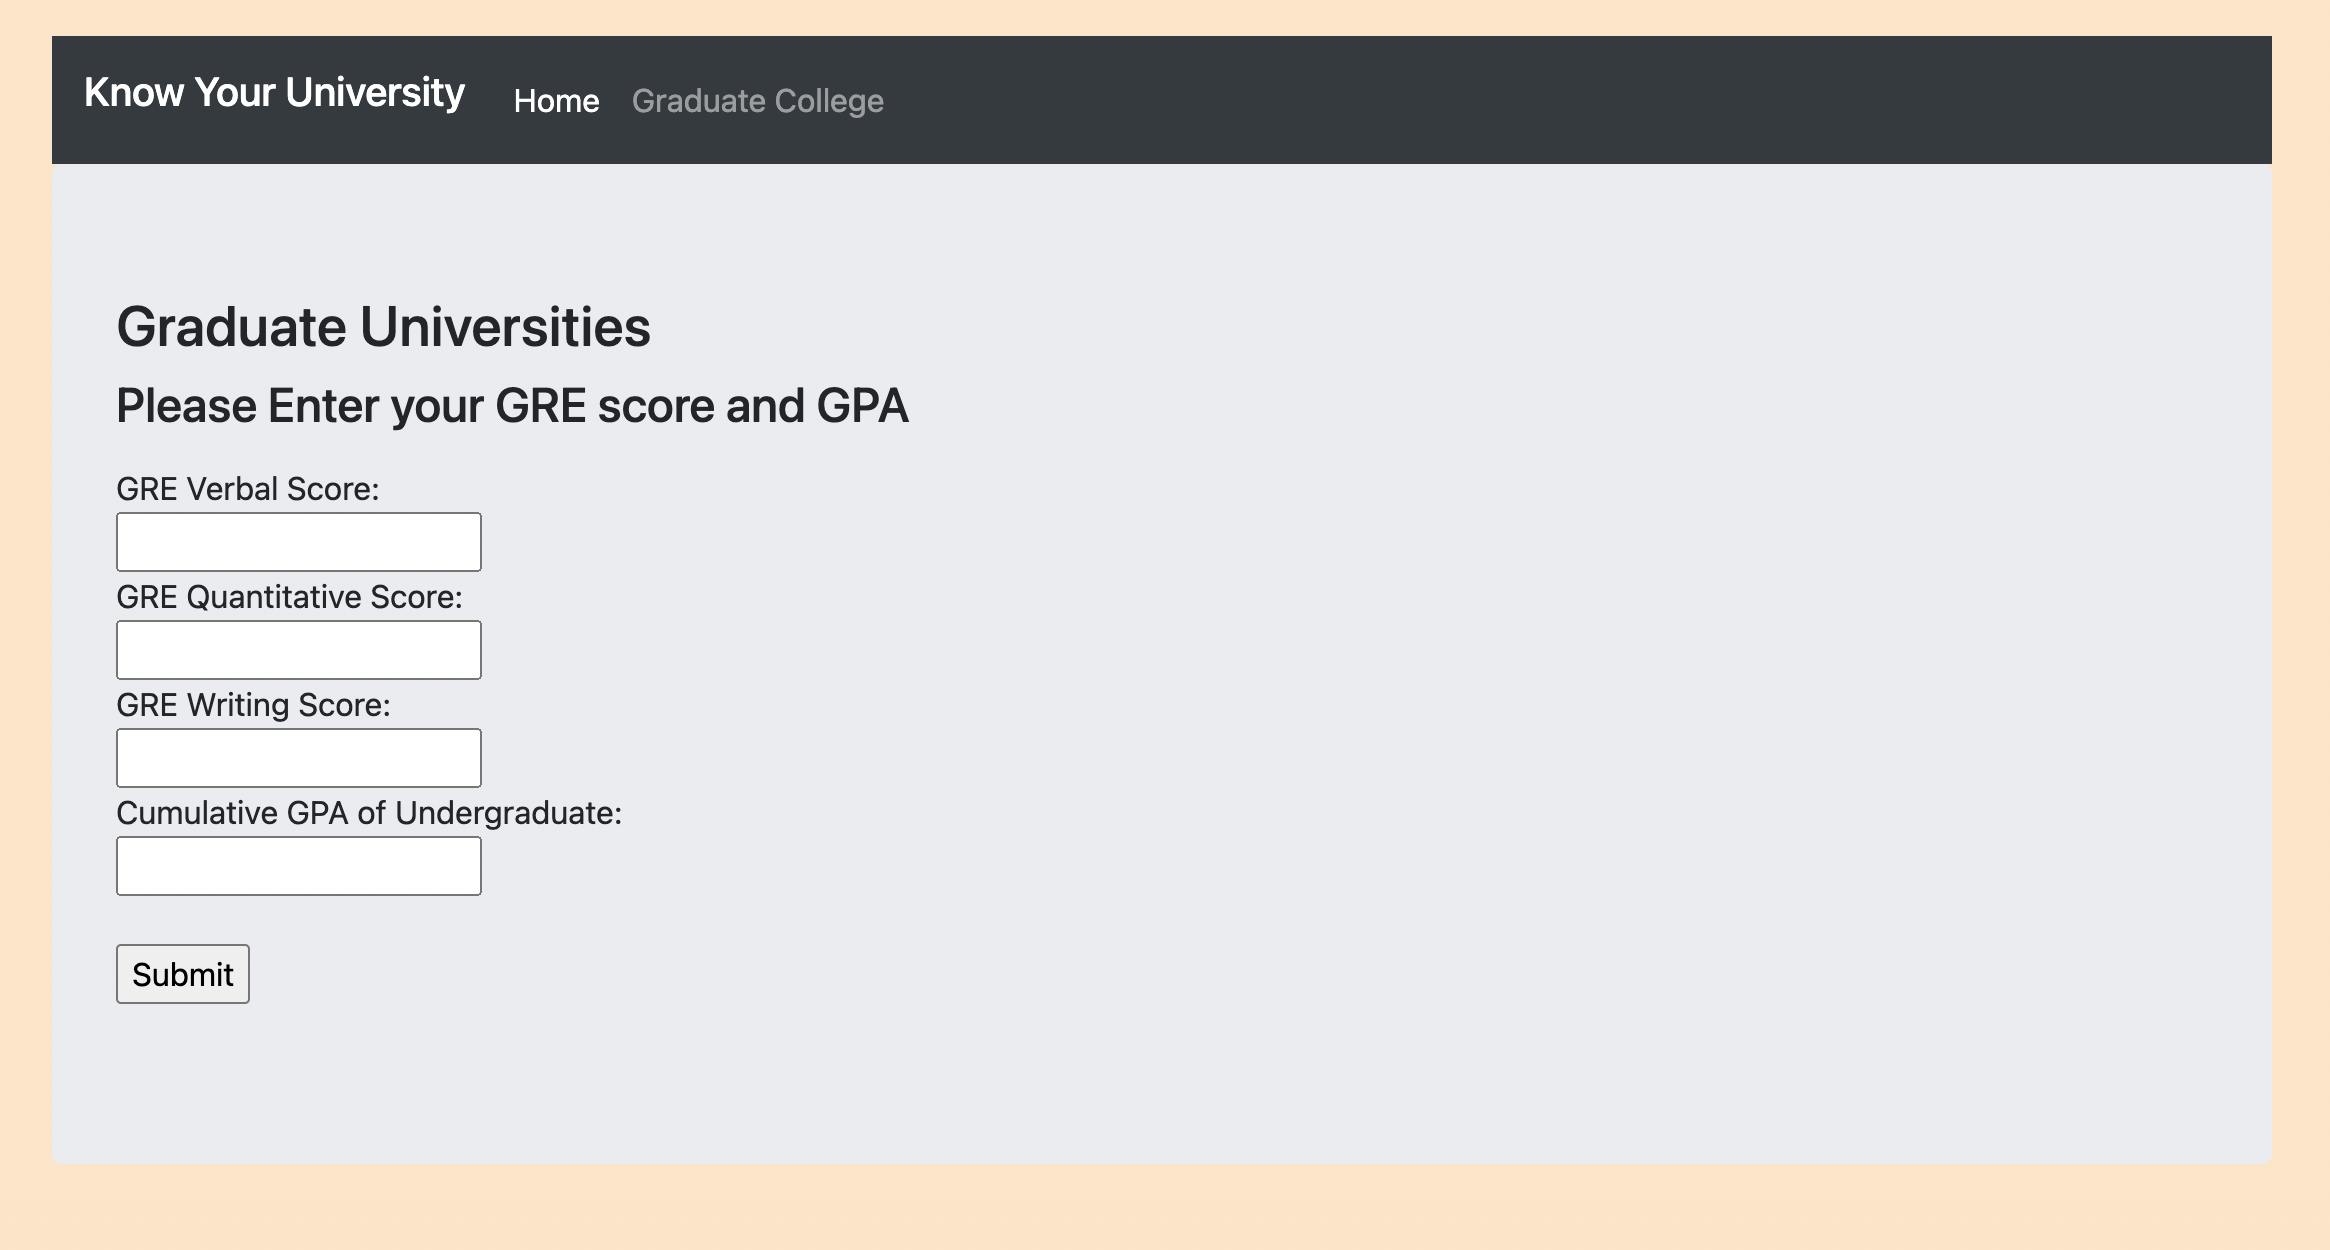

Once, after entering the scores the user clicks on submit to view the recommended universities based on his scores.

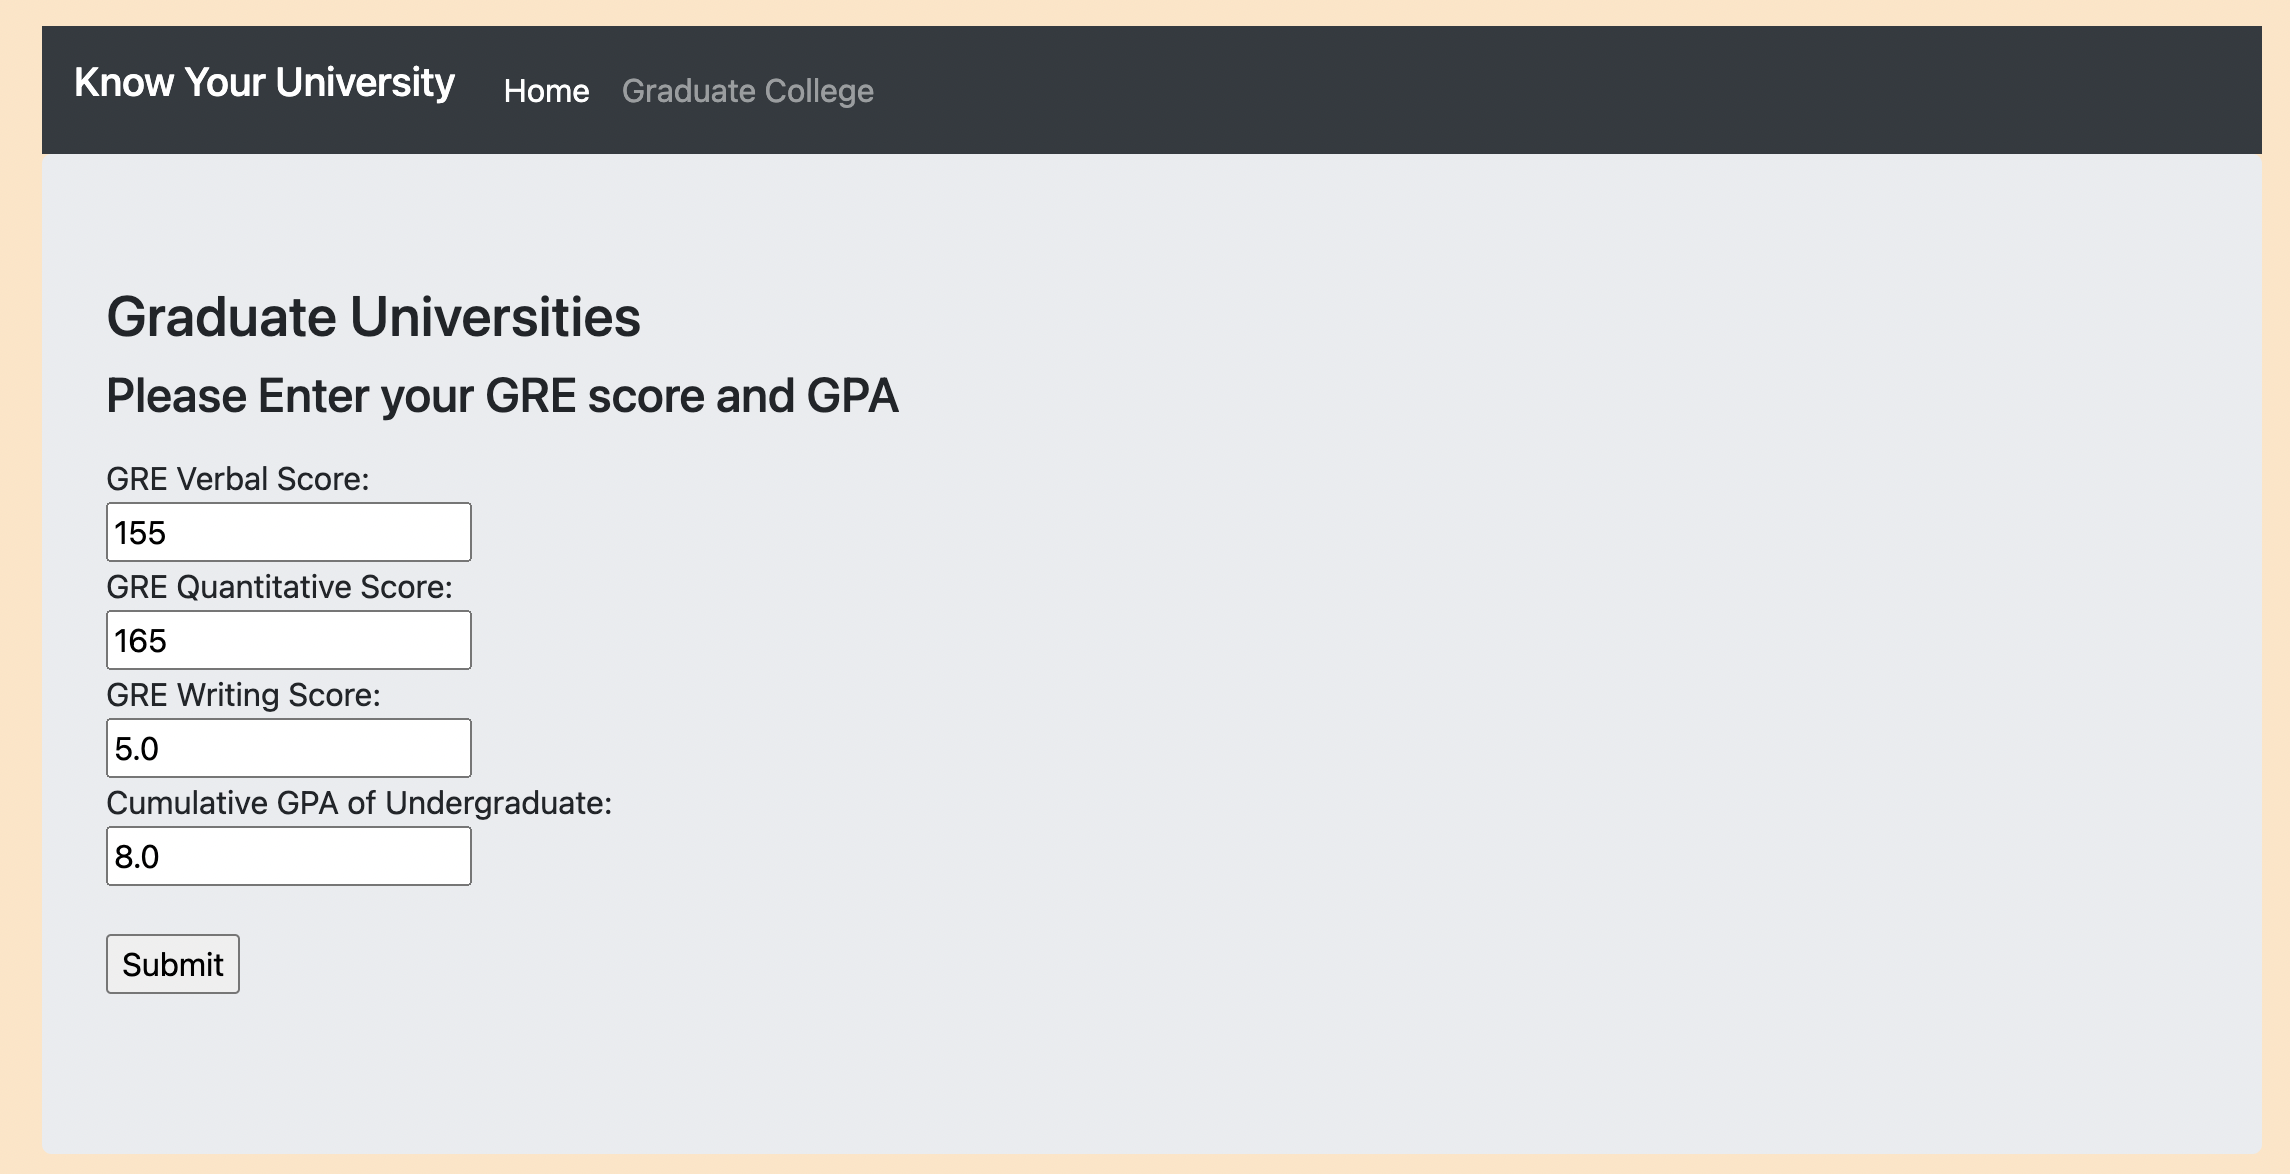

These are the universities recommended to the user based on their scores. Amongst the top 5 university the best university is also returned to the user using the knn classifier.​

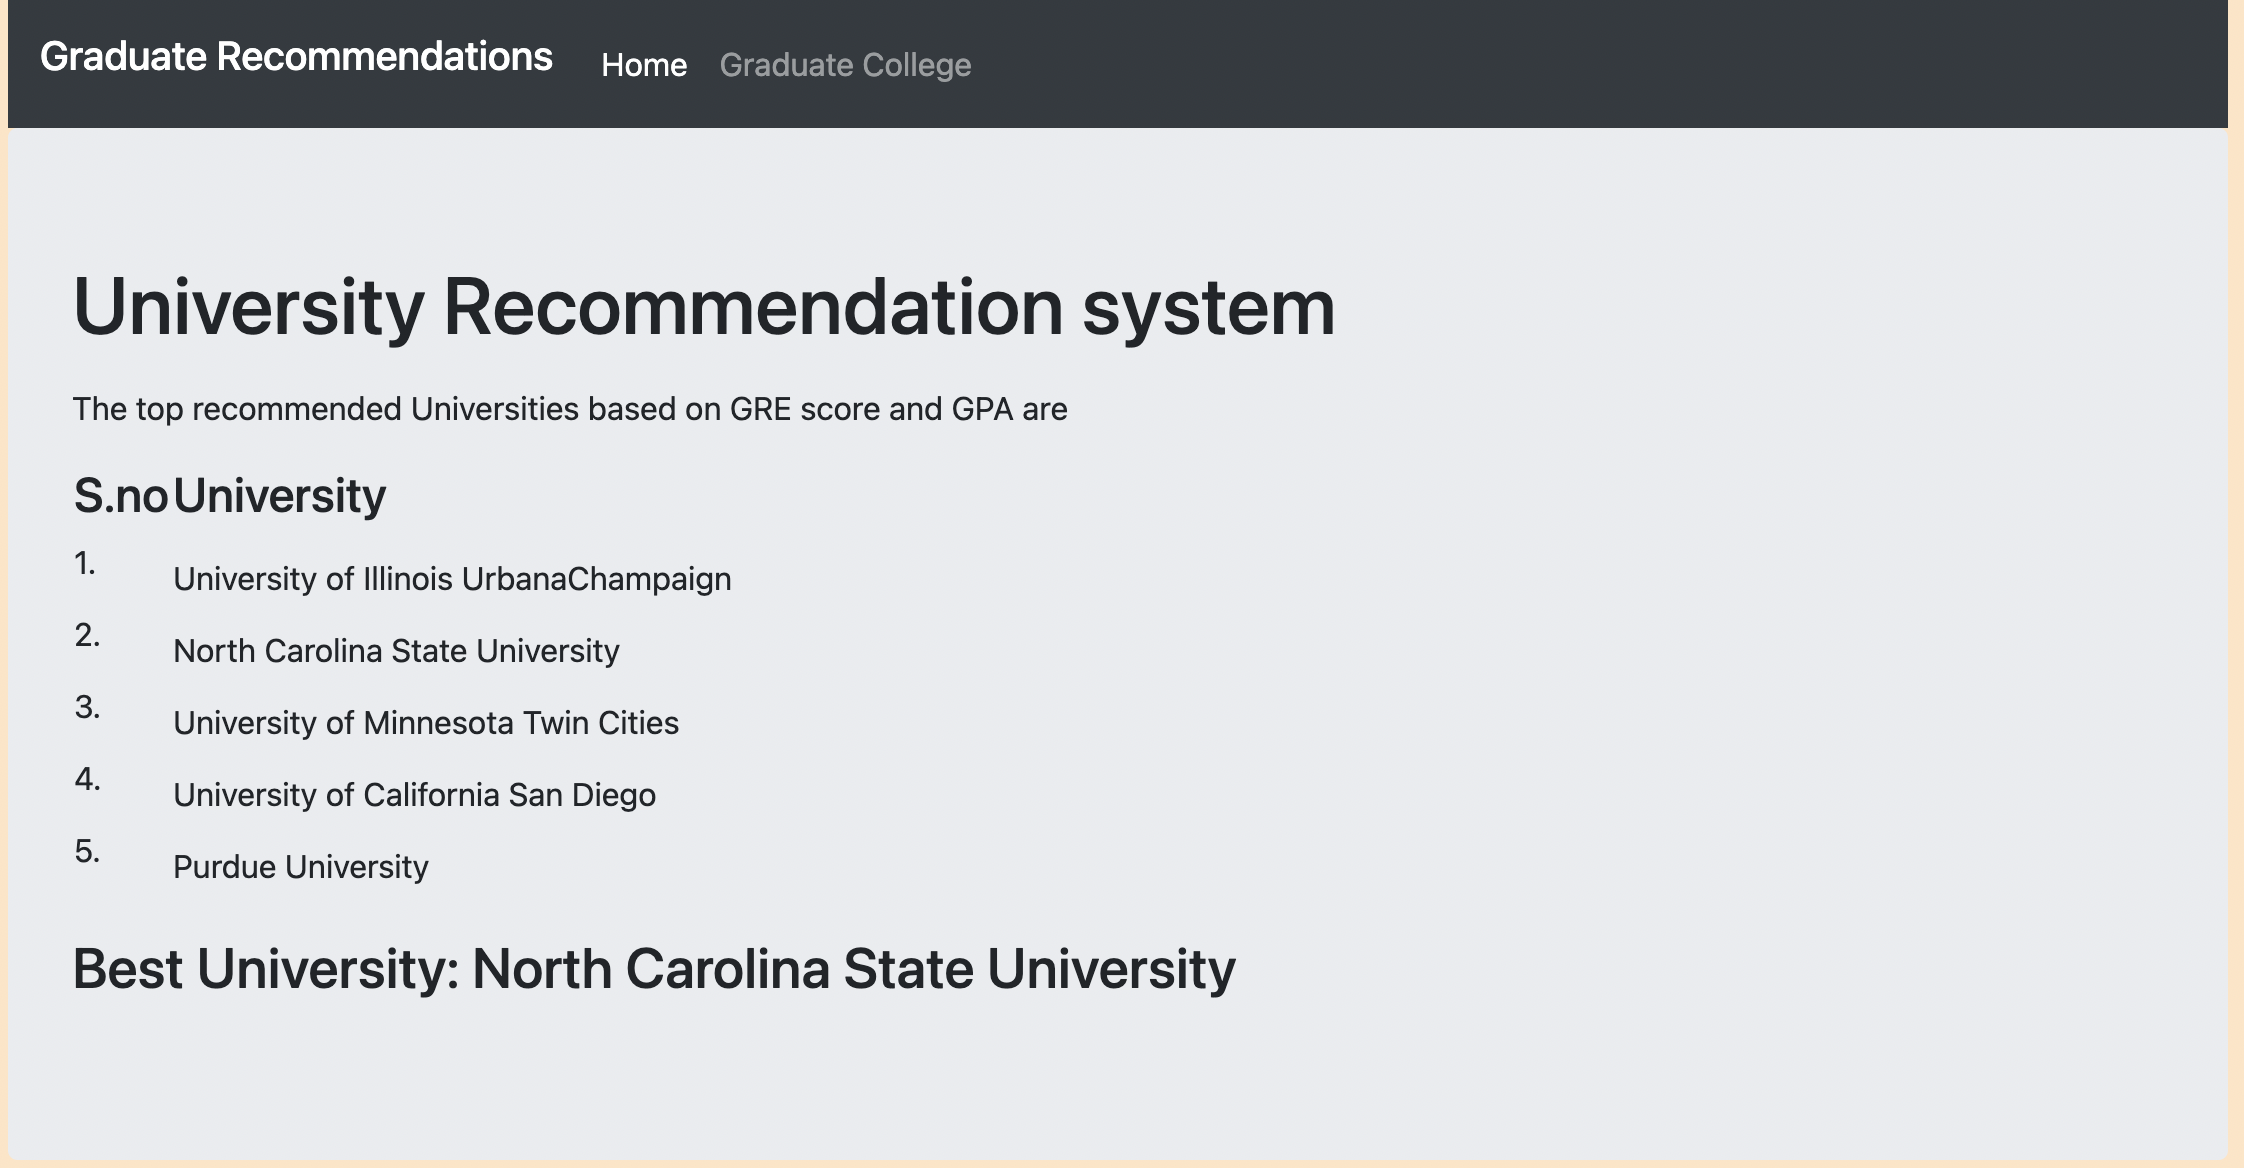

# **RESULTS**  


In this project we have considered Random Forest, Support Vector Machine and K-Nearest Neighbor classification algorithms for recommending universities to students. The performance of the models was compared using the accuracy evaluation metric. The Random Forest algorithm was found to be most accurate with an accuracy of 82% whereas the SVM and KNN have an accuracy of 35% and 32% respectively. 


# **CONCLUSION & FUTURE WORK**




This project will help students in shortlisting the best university based on their profile and will save a lot of time for the applicants. The academic data of previously accepted students have been taken into account to recommend the best university for current adimission seekers. Random Forest, Support Vector Machine and K-Nearest Neighbor models have been successfully used for building the university recommender system. The Random Forest is found to be the most accurate model among the 3 considered models. A user interface has also been built for this project. The proposed system will ask the student to enter their GRE score (Quant, Verbal & AWA) and CGPA and it will recommend a list of 5 best universities to the applicants. In the end, it will also display the top university among the 5 recommended universities.  

For future implementation, we can consider additional features like Statement of Purpose and Letter of Recommendation and can use text mining techniques to analyse those documents. Not only limiting our area of focus to graduate studies, we can also consider applicants interestsed in undergraduate studies by expanding our dataset to SAT scores, APT scores, 12th grades, etc. 


#**YOUTUBE LINK**

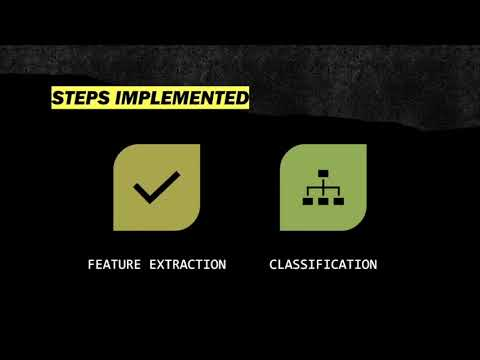

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo("fud7PxcYDY8")

#**PRESENTATION LINK**

https://olddominion-my.sharepoint.com/:p:/g/personal/smaje003_odu_edu/EQ8gTVbUmH5KncqL7aRiuugBzANSnmXqJovHTurFGi0Qhg

# **REFERENCES**



1.   https://www.analyticsvidhya.com/blog/2020/04/confusion-matrix-machine-learning/
2.   https://towardsdatascience.com/random-forest-in-python-24d0893d51c0
3.   https://powerbi.microsoft.com/en-us/data-visualization-tools/
4.   https://lucid.app/documents#/dashboard
5.   https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/
6.   https://medium.com/swlh/k-nearest-neighbor-ca2593d7a3c4






